In [171]:
# Importation des packages et librairiie

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
import seaborn as sns
import warnings

# word embedding
import string
import contractions
import nltk
import gensim
import re
# pip install spacy
# pip install --upgrade numpy h5py scipy spacy
# !python -m spacy download en_core_web_sm
import spacy

from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import string
from nltk import pos_tag

# Téléchargement des ressources NLTK nécessaires (à faire une seule fois)
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('all')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

warnings.filterwarnings('ignore')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\FranckOséeDOUNTIOZAB\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FranckOséeDOUNTIOZAB\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
## Package pour entrainer notre percetron 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

#pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Importation des librairies nécessaires pour le traitement de texte et l'entraînement du modèle
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import itertools

## Chargement de la base PRC

In [4]:
data=pd.read_csv("PRC Data Breach Chronology_Download_May_2022.csv")

In [5]:
#data[data['Type of organization']=='EDU'].sort_values(by='Total Records', ascending=False)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date Made Public         9015 non-null   object 
 1   Company                  9015 non-null   object 
 2   City                     5690 non-null   object 
 3   State                    8436 non-null   object 
 4   Type of breach           8926 non-null   object 
 5   Type of organization     9015 non-null   object 
 6   Total Records            9009 non-null   object 
 7   Description of incident  9012 non-null   object 
 8   Information Source       8962 non-null   object 
 9   Source URL               3607 non-null   object 
 10  Year of Breach           9015 non-null   int64  
 11  Latitude                 6541 non-null   float64
 12  Longitude                6541 non-null   float64
 13  Unnamed: 13              0 non-null      float64
 14  Unnamed: 14             

#### Préprocessing

In [7]:
data=pd.read_csv("PRC Data Breach Chronology_Download_May_2022.csv")


data['Total Records'] = data['Total Records'].str.replace(',', '')

# Puis conversion en float
data['Total Records'] = data['Total Records'].astype(float)


data['Date Made Public'] = pd.to_datetime(data['Date Made Public'], errors='coerce')
data['Year of Breach'] = pd.to_numeric(data['Year of Breach'], errors='coerce')

name={
    'Date Made Public':'Date_Made_Public',
    'Type of organization':'Type_of_organization',
    'Type of breach':'Type_of_breach',
    'Total Records':'Total_Records',
    'Year of Breach':'Year_of_Breach', 
    'Description of incident':'Description_of_incident'
}
data.rename(columns=name,inplace=True)

variables = [
    'Date_Made_Public',
    'Type_of_organization',
    'Type_of_breach',
    'Total_Records',
    'Year_of_Breach', 
    'Description_of_incident'
]
base_PRC=data[variables].copy()


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date_Made_Public         9015 non-null   datetime64[ns]
 1   Company                  9015 non-null   object        
 2   City                     5690 non-null   object        
 3   State                    8436 non-null   object        
 4   Type_of_breach           8926 non-null   object        
 5   Type_of_organization     9015 non-null   object        
 6   Total_Records            9009 non-null   float64       
 7   Description_of_incident  9012 non-null   object        
 8   Information Source       8962 non-null   object        
 9   Source URL               3607 non-null   object        
 10  Year_of_Breach           9015 non-null   int64         
 11  Latitude                 6541 non-null   float64       
 12  Longitude                6541 non-

In [9]:
#data[data['Type_of_organization']=='EDU'].sort_values(by='Total_Records', ascending=False)

In [10]:
base_PRC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date_Made_Public         9015 non-null   datetime64[ns]
 1   Type_of_organization     9015 non-null   object        
 2   Type_of_breach           8926 non-null   object        
 3   Total_Records            9009 non-null   float64       
 4   Year_of_Breach           9015 non-null   int64         
 5   Description_of_incident  9012 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 422.7+ KB


In [11]:
base_PRC.head(5)

,Date_Made_Public,Type_of_organization,Type_of_breach,Total_Records,Year_of_Breach,Description_of_incident
0,2006-03-03,BSF,HACK,88.0,2006,The company's website was breached sometime ar...
1,2012-01-04,BSF,PORT,0.0,2012,"The December 29, 2011 theft of a laptop from a..."
2,2012-02-18,BSR,PORT,0.0,2012,BDO was contracted by Rubio's to perform finan...
3,2012-02-22,BSF,HACK,0.0,2012,"On February 10, 2012, DHI Mortgage became awar..."
4,2012-03-12,MED,PORT,14000.0,2012,An office burglary on New Year's Eve 2011 resu...


In [12]:
# Nombre de valeurs manquantes par variable
base_PRC.isna().sum().sort_values(ascending=False)

Type_of_breach             89
Total_Records               6
Description_of_incident     3
Date_Made_Public            0
Type_of_organization        0
Year_of_Breach              0
dtype: int64

In [13]:
# Pourcentage de valeurs manquantes par variable (%)
100*base_PRC.isna().sum().sort_values(ascending=False)/base_PRC.shape[0]

Type_of_breach             0.987243
Total_Records              0.066556
Description_of_incident    0.033278
Date_Made_Public           0.000000
Type_of_organization       0.000000
Year_of_Breach             0.000000
dtype: float64

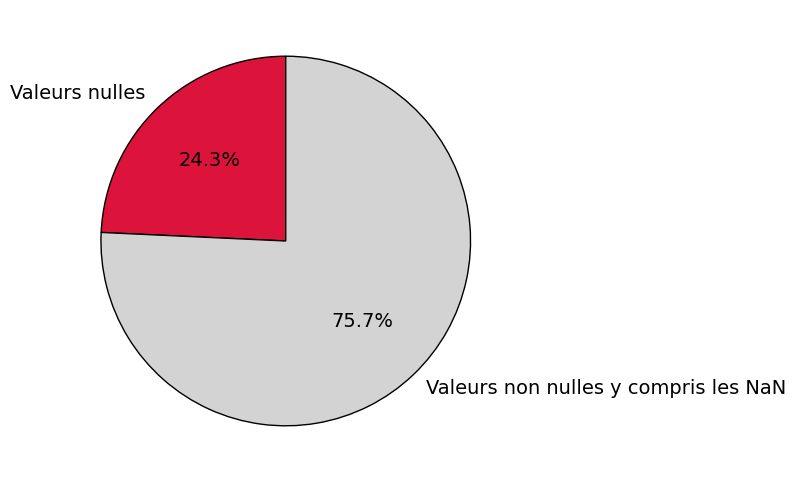

In [14]:

# Données
total = 9014
missing = 2187
not_missing = total - missing

# Labels et valeurs
labels = ['Valeurs nulles', 'Valeurs non nulles y compris les NaN']
sizes = [missing, not_missing]
colors = ['crimson', 'lightgray']

# Création du camembert
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, 
        textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'black'})

#plt.title("Proportion des valeurs nulles pour 'Total_Records'", fontsize=16)
plt.show()


In [15]:
# Nombre d'observation ayant la valeur du number of records null 
print(100*len(base_PRC[base_PRC['Total_Records']==0])/base_PRC.shape[0],'% ')
base_PRC[base_PRC['Total_Records']==0].count()

24.259567387687188 % 


Date_Made_Public           2187
Type_of_organization       2187
Type_of_breach             2187
Total_Records              2187
Year_of_Breach             2187
Description_of_incident    2186
dtype: int64

Ce qu'on fait dans la suite, c'est supprimer les observations avec les valeurs nulles du numbers of record car il n'apporte aucune information sur la sévérité de l'attaque cyber, et aussi supprimer les 3 observations qui n'ont pas de description d'incidence cyber.

In [16]:
#base_PRC[base_PRC.duplicated()]

In [17]:
# Quelques petites statistiques
base_PRC.select_dtypes(['object']).describe()

,Type_of_organization,Type_of_breach,Description_of_incident
count,9015,8926,9012
unique,8,8,5916
top,MED,HACK,Location of breached information: Theft\nBusin...
freq,4343,2533,706


Ainsi il pourrait avoir des redondances dans la variable de description des incidences qui sera analysée ultérieurement 

In [18]:
# Base à analyser 
data_PRC=base_PRC[(base_PRC['Total_Records']!=0)&(~(base_PRC['Total_Records'].isna()))].copy()
#data_PRC=base_PRC[(base_PRC['Total_Records']!=0)].copy()


In [19]:
# import pandas as pd

# # Données sous forme de dictionnaire
# stats = {
#     'count': 4258,
#     'mean': 44923,
#     'std': 1245671,
#     'min': 1,
#     '25%': 280,
#     '50%': 808,
#     '60%': 1168,
#     '75%': 2900,
#     '90%': 12690,
#     '95%': 30666,
#     'max': 78800000
# }

# # Création d'un DataFrame avec une seule ligne
# df_stats = pd.DataFrame([stats])

# # Conversion en DataFrame 2 lignes x N colonnes : 
# # 1ère ligne = noms des stats, 2e ligne = valeurs
# df_transposed = pd.DataFrame([df_stats.columns.tolist(), df_stats.iloc[0].tolist()])

# # Optionnel : ajouter un index pour plus de clarté
# df_transposed.index = ['Statistique', 'Valeur']

# df_transposed


In [20]:
# Analyse du nombre de personnes affectées
data_PRC.select_dtypes(['float']).describe(percentiles=[0.25, 0.5,0.6, 0.75, 0.9, 0.95]).style.format("{:.0f}")

,Total_Records
count,6822
mean,1522632
std,41960690
min,1
25%,613
50%,2000
60%,3386
75%,10000
90%,63000
95%,259123


La moyenne est très décalée par rapport à la médiane ce qui montre que notre variable qui évalue la sévérité d'une attaque cyber est à queue lourde. Le graphique qui suite conforte bien nos observations :

## Analyse de données 

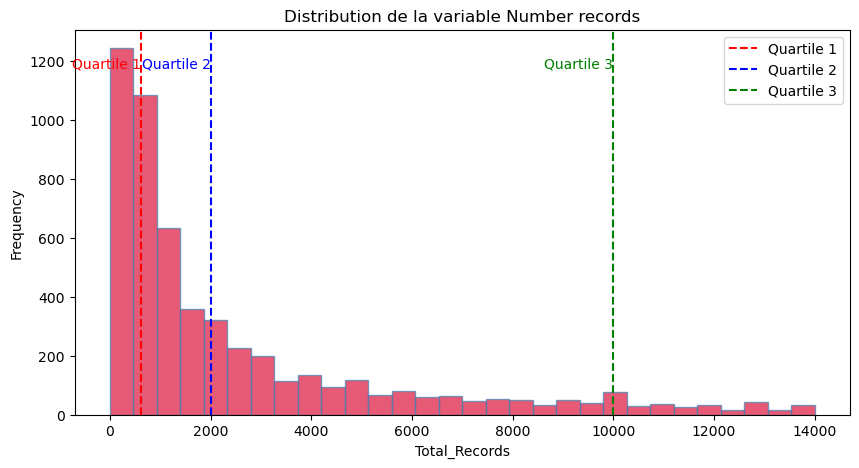

In [21]:
# Calcul des quartiles
q1 = data_PRC['Total_Records'].quantile(0.25)
q2 = data_PRC['Total_Records'].quantile(0.50)
q3 = data_PRC['Total_Records'].quantile(0.75)

# --- Figure 1 : Histogramme global avec lignes de quartiles ---
plt.figure(figsize=(10, 5))
q_data = data_PRC[(data_PRC['Total_Records'] <= 14000)]
plt.hist(q_data['Total_Records'], bins=30, color='crimson', edgecolor='SteelBlue', alpha=0.7)
plt.axvline(q1, color='red', linestyle='--', label='Quartile 1')
plt.axvline(q2, color='blue', linestyle='--', label='Quartile 2')
plt.axvline(q3, color='green', linestyle='--', label='Quartile 3')

plt.legend(loc='upper right')
plt.title('Distribution de la variable Number records')
plt.xlabel('Total_Records')
plt.ylabel('Frequency')
plt.text(q1, plt.ylim()[1]*0.9, 'Quartile 1', color='red', ha='right')
plt.text(q2, plt.ylim()[1]*0.9, 'Quartile 2', color='blue', ha='right')
plt.text(q3, plt.ylim()[1]*0.9, 'Quartile 3', color='green', ha='right')
plt.show()


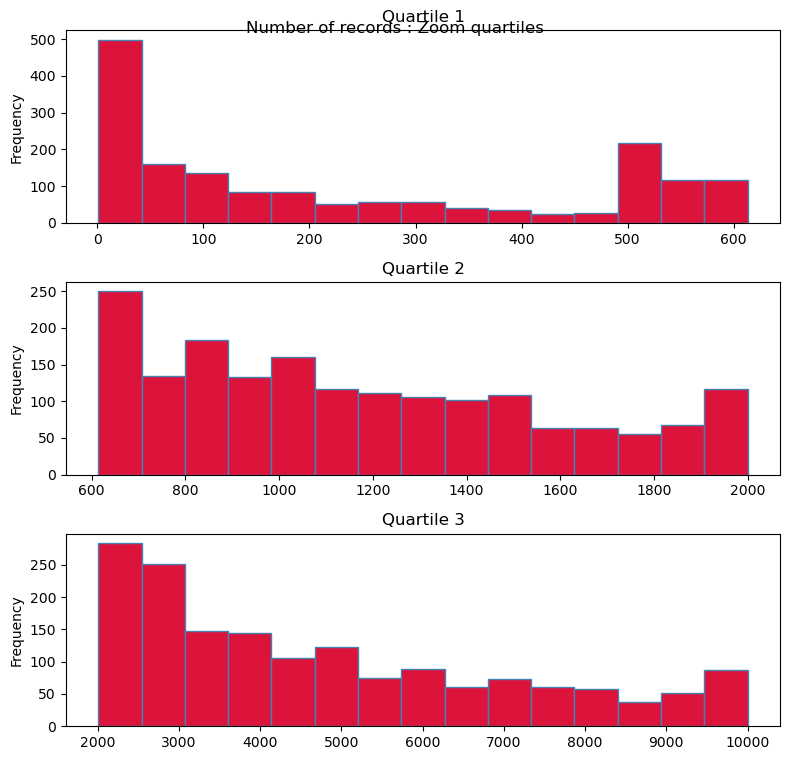

In [22]:


# --- Figure 2 : Zoom sur les quartiles ---
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Quartile 1
q1_data = data_PRC[data_PRC['Total_Records'] <= q1]
axs[0].hist(q1_data['Total_Records'], bins=15, color='crimson', edgecolor='SteelBlue')
axs[0].set_title('Quartile 1')

# Quartile 2
q2_data = data_PRC[(data_PRC['Total_Records'] > q1) & (data_PRC['Total_Records'] <= q2)]
axs[1].hist(q2_data['Total_Records'], bins=15, color='crimson', edgecolor='SteelBlue')
axs[1].set_title('Quartile 2')

# Quartile 3
q3_data = data_PRC[(data_PRC['Total_Records'] > q2) & (data_PRC['Total_Records'] <= q3)]
axs[2].hist(q3_data['Total_Records'], bins=15, color='crimson', edgecolor='SteelBlue')
axs[2].set_title('Quartile 3')

# Max
# q4_data = data_PRC[(data_PRC['Total_Records'] > q3)]
# axs[3].hist(q4_data['Total_Records'], bins=15, color='darkgreen', edgecolor='black')
# axs[3].set_title('Max')

for ax in axs:
    ax.set_ylabel('Frequency')

fig.suptitle( 'Number of records : Zoom quartiles', y=0.93)
plt.tight_layout()
plt.show()

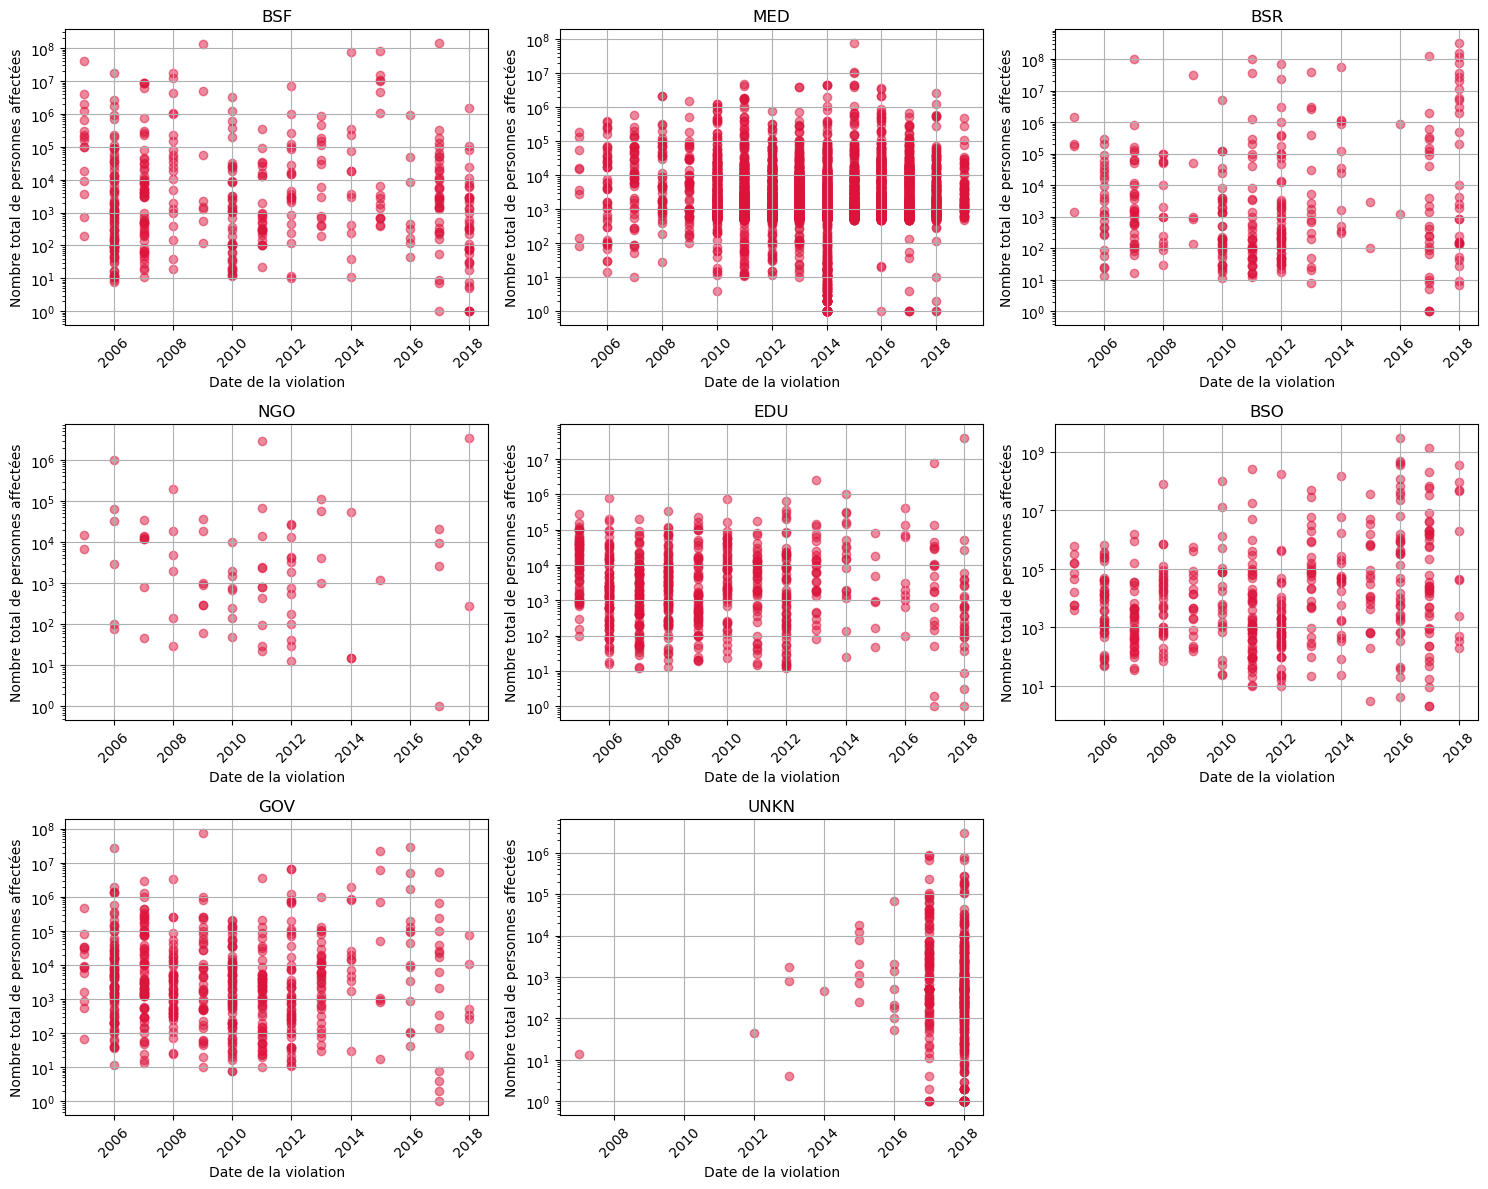

In [23]:
# Liste des types d'organisation uniques
unique_org_types = data_PRC['Type_of_organization'].unique()

# Définir la grille : 3 lignes, 3 colonnes
nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12), sharex=False)

# Aplatir les axes pour itérer facilement
axes = axes.flatten()

# Tracer chaque sous-graphe
for i, org_type in enumerate(unique_org_types):
    ax = axes[i]
    subset = data_PRC[data_PRC['Type_of_organization'] == org_type]
    ax.scatter(subset['Year_of_Breach'], subset['Total_Records'], alpha=0.5,color='crimson')
    ax.set_yscale('log')
    ax.set_title(org_type)
    ax.set_xlabel('Date de la violation')
    ax.set_ylabel('Nombre total de personnes affectées')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)  # Rotation des dates pour lisibilité

# Supprimer les axes inutilisés s'il y a moins de 9 types
for j in range(len(unique_org_types), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [24]:
# Quantile 60%
Q40 = data_PRC['Total_Records'].quantile(0.6)
Q40

3385.5999999999976

In [25]:

# Calcul des statistiques descriptives groupées
stats = data_PRC.groupby('Type_of_organization')['Total_Records'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])

# Renommer les colonnes pour correspondre au tableau souhaité
stats = stats.rename(columns={
    'count': 'Number',
    'mean': 'Mean',
    '25%': 'q0.25',
    '50%': 'Median',
    '75%': 'q0.75',
    '90%': 'q0.9',
    '95%': 'q0.95',
    'max': 'Max'
})
# Afficher le tableau
base=stats[['Number', 'Mean', 'q0.25', 'Median', 'q0.75', 'q0.9', 'q0.95', 'Max']]
base

,Number,Mean,q0.25,Median,q0.75,q0.9,q0.95,Max
Type_of_organization,,,,,,,,
BSF,411.0,1.566457e+06,200.00,2000.0,27000.00,350000.0,2950000.0,1.455000e+08
BSO,426.0,1.830791e+07,618.75,5750.0,81620.00,1850000.0,36125000.0,3.000000e+09
BSR,300.0,4.610538e+06,111.00,1000.0,44558.75,1010000.0,19726235.0,3.270000e+08
EDU,672.0,9.757767e+04,418.75,2448.0,14054.25,54800.0,106900.0,4.000000e+07
GOV,562.0,4.047748e+05,380.75,2836.5,21000.00,168900.0,700950.0,7.600000e+07
MED,3911.0,6.369108e+04,826.00,2000.0,7752.50,29156.0,74600.0,7.880000e+07
NGO,75.0,1.125937e+05,215.00,2000.0,14000.00,57400.0,137000.0,3.500000e+06
UNKN,465.0,2.291834e+04,48.00,500.0,2264.00,17788.4,58356.2,3.030920e+06


#### Analyse du nombre d'incidences en fonction du type d'organisation touchée

#### Analyse du nombre d'incidences en fonction du type de brèche

#### Analyse du nombre d'incidences en fonction de l'année

#### Une analyse faite parmi les sinistres graves

On suppose que les sinistres graves sont des incidences dont le nombre total de personnes affectées est supérieur au 60ème percentile (Q60) de la distribution des sinistres.

In [26]:
# Selectionner les observations pour lesquelles le nombre de personnes affectées n'est pas manquant
data_PRC_model=data_PRC[~(data_PRC['Total_Records'].isna())]
# Calculer le quantile 60% pour le nombre de personnes affectées
Q40 = data_PRC_model['Total_Records'].quantile(0.6)
print("Quantile 60% :", Q40)
#Filtrer les données pour ne garder que les sinistres grave soit ceux avec un nombre de personnes affectées supérieur au quantile 60%
# Base de données des sinistres graves
data_PRC_model_grave = data_PRC_model[data_PRC_model['Total_Records'] > Q40]

Quantile 60% : 3385.5999999999976


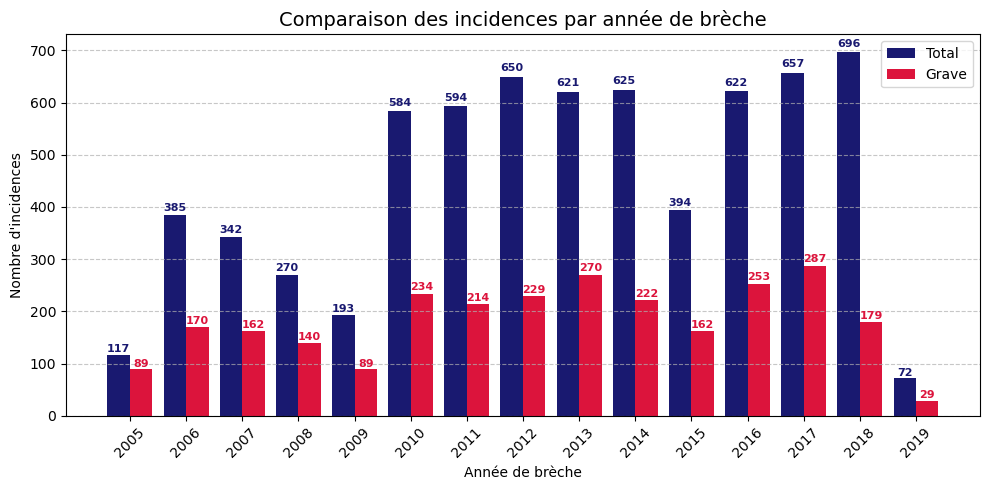

In [27]:
# Compter les occurrences par année
total_counts = data_PRC_model['Year_of_Breach'].value_counts()
grave_counts = data_PRC_model_grave['Year_of_Breach'].value_counts()

# Union des années présentes dans les deux bases
all_years = sorted(set(total_counts.index).union(grave_counts.index))  # tri croissant

# Réindexation pour garantir l’ordre et combler les années manquantes avec 0
total_counts = total_counts.reindex(all_years, fill_value=0)
grave_counts = grave_counts.reindex(all_years, fill_value=0)

# Création du graphique
x = np.arange(len(all_years))
bar_width = 0.4

plt.figure(figsize=(10, 5))

# Barres : Total et Grave
bars1 = plt.bar(x - bar_width/2, total_counts.values, width=bar_width, label='Total', color='midnightblue')
bars2 = plt.bar(x + bar_width/2, grave_counts.values, width=bar_width, label='Grave', color='crimson')

# Ajouter les valeurs au-dessus des barres
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height + height * 0.01,
                 f'{int(height)}', ha='center', va='bottom', fontsize=8, fontweight='bold', color='midnightblue')

for bar in bars2:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height + height * 0.01,
                 f'{int(height)}', ha='center', va='bottom', fontsize=8, fontweight='bold', color='crimson')

# Titres et mise en forme
plt.title("Comparaison des incidences par année de brèche", fontsize=14)
plt.xlabel("Année de brèche")
plt.ylabel("Nombre d'incidences")
plt.xticks(x, all_years, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


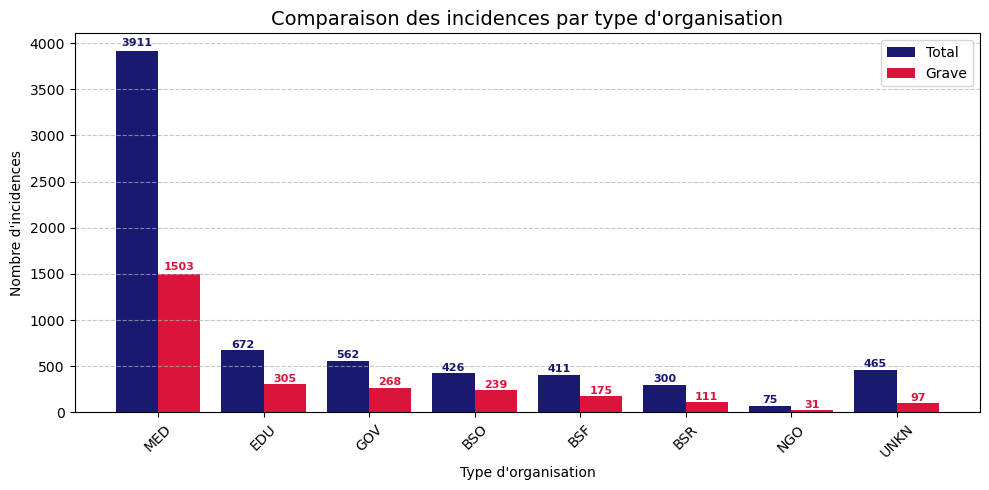

In [28]:
# Compter les occurrences
total_counts = data_PRC_model['Type_of_organization'].value_counts()
grave_counts = data_PRC_model_grave['Type_of_organization'].value_counts()

# S'assurer que toutes les modalités sont présentes
all_types = set(total_counts.index).union(grave_counts.index)

# Compléter les manquants
total_counts = total_counts.reindex(all_types, fill_value=0)
grave_counts = grave_counts.reindex(all_types, fill_value=0)

# Mettre UNKN de côté, trier les autres par ordre décroissant des totaux
types_sorted = total_counts.drop('UNKN', errors='ignore').sort_values(ascending=False).index.tolist()
if 'UNKN' in total_counts.index:
    types_sorted.append('UNKN')

# Réordonner les deux séries
total_counts = total_counts.reindex(types_sorted)
grave_counts = grave_counts.reindex(types_sorted)

# Création du graphique
x = np.arange(len(types_sorted))
bar_width = 0.4

plt.figure(figsize=(10, 5))

bars1 = plt.bar(x - bar_width/2, total_counts.values, width=bar_width, label='Total', color='midnightblue')
bars2 = plt.bar(x + bar_width/2, grave_counts.values, width=bar_width, label='Grave', color='crimson')

# Ajouter les valeurs au-dessus des barres
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height + height * 0.01,
                 f'{int(height)}', ha='center', va='bottom', fontsize=8, fontweight='bold', color='midnightblue')

for bar in bars2:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height + height * 0.01,
                 f'{int(height)}', ha='center', va='bottom', fontsize=8, fontweight='bold', color='crimson')

# Titres et mise en forme
plt.title("Comparaison des incidences par type d'organisation", fontsize=14)
plt.xlabel("Type d'organisation")
plt.ylabel("Nombre d'incidences")
plt.xticks(x, types_sorted, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


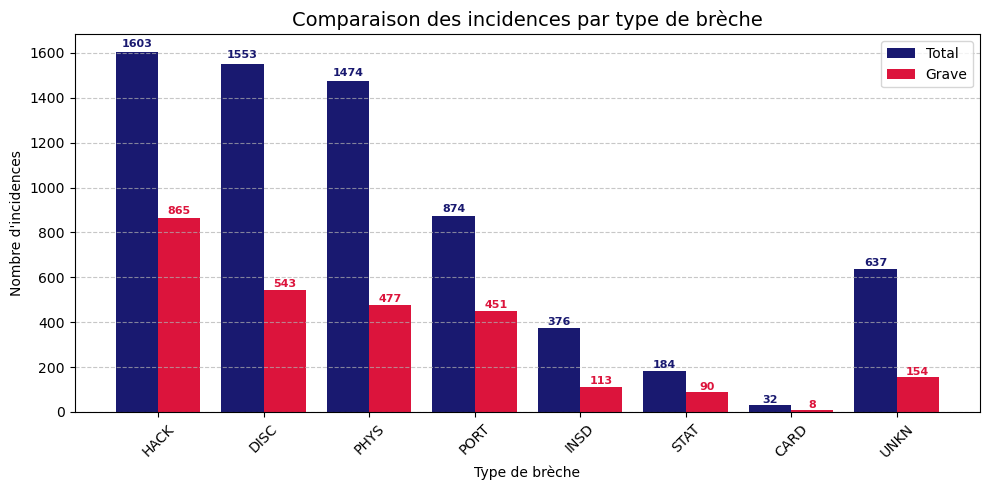

In [29]:
# Compter les occurrences
total_counts = data_PRC_model['Type_of_breach'].value_counts()
grave_counts = data_PRC_model_grave['Type_of_breach'].value_counts()

# S'assurer que toutes les modalités sont présentes
all_types = set(total_counts.index).union(grave_counts.index)

# Compléter les manquants
total_counts = total_counts.reindex(all_types, fill_value=0)
grave_counts = grave_counts.reindex(all_types, fill_value=0)

# Mettre UNKN de côté, trier les autres par ordre décroissant des totaux
types_sorted = total_counts.drop('UNKN', errors='ignore').sort_values(ascending=False).index.tolist()
if 'UNKN' in total_counts.index:
    types_sorted.append('UNKN')

# Réordonner les deux séries
total_counts = total_counts.reindex(types_sorted)
grave_counts = grave_counts.reindex(types_sorted)

# Création du graphique
x = np.arange(len(types_sorted))
bar_width = 0.4

plt.figure(figsize=(10, 5))

bars1 = plt.bar(x - bar_width/2, total_counts.values, width=bar_width, label='Total', color='midnightblue')
bars2 = plt.bar(x + bar_width/2, grave_counts.values, width=bar_width, label='Grave', color='crimson')

# Ajouter les valeurs au-dessus des barres
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height + height * 0.01,
                 f'{int(height)}', ha='center', va='bottom', fontsize=8, fontweight='bold', color='midnightblue')

for bar in bars2:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height + height * 0.01,
                 f'{int(height)}', ha='center', va='bottom', fontsize=8, fontweight='bold', color='crimson')

# Titres et mise en forme
plt.title("Comparaison des incidences par type de brèche", fontsize=14)
plt.xlabel("Type de brèche")
plt.ylabel("Nombre d'incidences")
plt.xticks(x, types_sorted, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Réseau de neurone 

### Word embeding Algorithme

#### Prétraitement : Nettoyage du texte

In [378]:
nb_duplicated = data_PRC_model[['Description_of_incident']].duplicated().sum()
print(f"Nombre de lignes dupliquées dans le DataFrame : {nb_duplicated}")

# Pour une liste Python                     
nb_duplicated_list =  len(set(data_PRC_model['Description_of_incident'].tolist()))
print(f"Nombre de valeurs non dupliquées dans la liste : {nb_duplicated_list}")

Nombre de lignes dupliquées dans le DataFrame : 3063
Nombre de valeurs non dupliquées dans la liste : 3759


In [293]:
# data_PRC_model['Description_of_incident'][9012]
# data_PRC_model['Description_of_incident'][9011]
# data_PRC_model['Description_of_incident'][9014]

'Location of breached information: Theft\nBusiness associate present: No'

In [529]:
#récupérer sous forme de liste
corpus = data_PRC_model['Description_of_incident'].fillna(' ').tolist()
# Prétraitement du texte pour l'analyse des descriptions d'incidents
def preprocess_text(corpus):
    def clean_text(text):
        # Supprimer les \xa0 et les espaces multiples
        text = re.sub(r'\n', ' ', text)
        text = text.replace('\xa0', ' ')
        text = re.sub(r'\s+', ' ', text)  # pour éviter les espaces multiples
        
        # Supprimer les URLs
        text = re.sub(r'http\S+', ' ', text)
        
        # Supprimer toutes les formes de dates
        date_patterns = [
            r'\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\.?\s+\d{1,2},?\s+\d{2,4}',  # March 12, 2011
            r'\b\d{1,2}\s+(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\s+\d{2,4}',  # 12 March 2011
            r'\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\s+\d{1,2}',  # March 12
            r'\b\d{1,2}/\d{1,2}/\d{2,4}',  # 12/31/2011
            r'\b\d{4}\b',  # année seule
        ]
        for pattern in date_patterns:
            text = re.sub(pattern, ' ', text)
            
        # Supprimer les mentions de mois
        def remove_months_with_regex(text):
            pattern = r'\b(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|' \
                    r'aug(?:ust)?|sep(?:t(?:ember)?)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)\b'
            return re.sub(pattern, '', text, flags=re.IGNORECASE)
        # Appliquer la fonction pour supprimer les mois
        text = remove_months_with_regex(text)
        
        # Supprimer les mentions de jours de la semaine
        days_of_week = r'\b(?:Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday)\b'
        text = re.sub(days_of_week, ' ', text, flags=re.IGNORECASE)
        

        # Supprimer les balises HTML
        text = re.sub(r'<.*?>', ' ', text)

        # Remplacer les virgules dans les nombres (ex: "4,000" -> "4000")
        text = re.sub(r'(?<=\d),(?=\d)', '', text)
        
        # Supprimer les adresses IP
        re.sub('\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', '', text)
        

        # Développement des contractions (ex: I'm → I am)
        text = contractions.fix(text)
        
        # Mettre en minuscules
        text = text.lower()

        # Supprimer ponctuation + chiffres
        text = text.replace('.', ' ') ### permet de gérer les mots collé avec un point
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'\d+', '', text) # Supprimer tous les chiffres
        
        # Suppression des caractères non alphabétiques et espaces multiples
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\W+', ' ', text)
        text = re.sub(r' +', ' ', text).strip()
        text = re.sub(r'\s+', ' ', text).strip() # Supprimer les doubles espaces et 
        

        # Tokenisation
        # Supprimer les mots vides (stop words) et lemmatization
        stop_words = set(stopwords.words('english'))
        custom_stopwords = {
            'however', 'although', 'whose', 'whom', 'furthermore', 'therefore',
            'nonetheless', 'nevertheless', 'thus', 'moreover', 'meanwhile',
            'hence', 'indeed', 'besides', 'elsewhere', 'regardless','also',
            'anyway', 'whereas', 'wherein', 'whereby', 'whereupon', 'whenever','sometime',
            'somewhere', 'anywhere', 'everywhere', 'nowhere', 'afterward','whether'
        }
        stop_words.update(custom_stopwords)
        
        def get_wordnet_pos(treebank_tag):
            """
            Convertit les tags POS de Treebank (nltk.pos_tag) en tags compatibles WordNet pour la lemmatisation.
            """
            if treebank_tag.startswith('J'):
                return wordnet.ADJ
            elif treebank_tag.startswith('V'):
                return wordnet.VERB
            elif treebank_tag.startswith('N'):
                return wordnet.NOUN
            elif treebank_tag.startswith('R'):
                return wordnet.ADV
            else:
                return wordnet.NOUN  # Par défaut
            
         # mettre un point à la fin de la phrase si nécessaire
        if text and text[-1] not in '.!?':
            text += '.'

        def lemmatize_sentence(sentence):
            lemmatizer = WordNetLemmatizer()            
            # Tokenize
            tokens_ = word_tokenize(sentence)
            # POS tagging
            pos_tags = nltk.pos_tag(tokens_)
            
            lemmatized_tokens = []
            for word, tag in pos_tags:
                if word.lower() not in stop_words and word.isalpha():
                    wn_tag = get_wordnet_pos(tag)
                    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
                    lemmatized_tokens.append(lemma.lower())
            
            return lemmatized_tokens
        tokens = lemmatize_sentence(text)
        
        # Suppression des stopwords après lemmatisation
        # Set de stopwords enrichi      
        tokens = [word for word in tokens if word not in stop_words]
        
        # Supprimer les tokens de 2 caractères ou moins
        filtered_tokens = [word for word in tokens if len(word) > 2]

        return filtered_tokens
    # Appliquer le prétraitement
    
    all_tokens = [clean_text(doc) for doc in corpus]
    
    # # Génération des bigrams
    # bigram_model = Phrases(all_tokens, min_count=10, threshold=20)
    # bigram_phraser = Phraser(bigram_model)
    # bigram_sentences = [bigram_phraser[sent] for sent in all_tokens]

    # #Génération des trigrams
    # trigram_model = Phrases(bigram_sentences, min_count=10, threshold=25)
    # trigram_phraser = Phraser(trigram_model)
    # trigram_sentences = [trigram_phraser[sent] for sent in bigram_sentences]
    return all_tokens

##### Définition de la base definitive

In [517]:
corpus[4000:]

['A podiatrist licensed in the state of Maryland operated a podiatry practice called Chesapeake Wound Care Center from his home. \xa0Between April 1, 2002 and October 11, 2004, he submitted 80 fraudulent claims to Medicare for podiatry services that had not been performed at nursing facilities. \xa0The podiatrist signed a Settlement Agreement with the government on October 30, 2007 after being caught, but then fraudulently billed Medicare advantage plans between October 31, 2007 and July 20, 2010. \xa0The podiatrist admitted to submitting false bills for podiatry care by misusing the names and personal information of about 200 nursing home patients. He was subsequently charged with health care fraud and aggravated identity theft. He was sentenced to 54 months in prison, three years of supervised release, and ordered to pay $1,122,992.08 \xa0in restitution for the fraudulent billing of Medicare.',
 'Thousands of patient records were found in an unsecured trash can. \xa0They contained na

In [530]:
# Base des descriptions des incidents 
data_PRC_model=data_PRC_model[~(data_PRC_model['Description_of_incident'].isna())].copy()
corpus =data_PRC_model['Description_of_incident'].tolist()
# Prétraitement des descriptions des incidents graves
data_pretrained=preprocess_text(corpus)
# Importation des bibliothèques nécessaires
data_PRC_model['word']=data_pretrained

# création d'une nouvelle colonne 'niveau_gravite' basée sur le quantile 60%
data_PRC_model['niveau_gravite'] = np.where(data_PRC_model['Total_Records'] > Q40, 1, 0)

# Filtrer les données pour ne garder que les variables nécessaires
data_PRC_model_new = data_PRC_model[['word', 'niveau_gravite']].copy()

In [531]:
data_pretrained[0]

['company',
 'website',
 'breach',
 'around',
 'hacker',
 'attempt',
 'gain',
 'access',
 'certain',
 'customer',
 'private',
 'information',
 'social',
 'security',
 'number',
 'name',
 'address',
 'bank',
 'account',
 'name',
 'bank',
 'account',
 'number',
 'compromise',
 'least',
 'individual',
 'affect']

[]

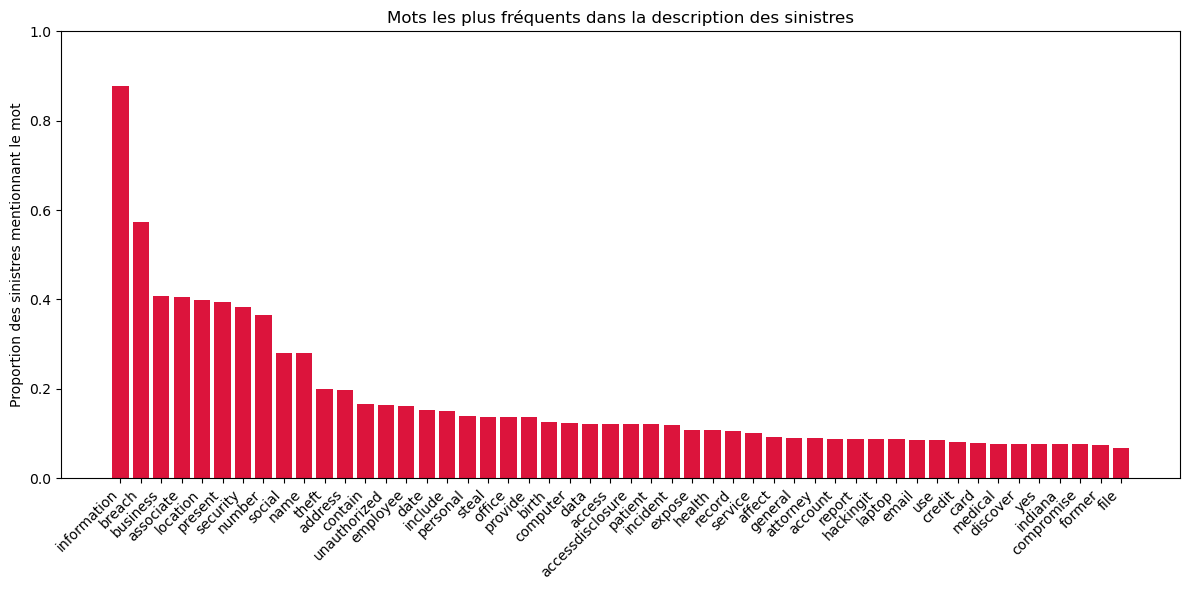

In [532]:

# Initialisation des compteurs
grave_count = defaultdict(int)
attritionnel_count = defaultdict(int)

# Compter pour chaque mot, combien de sinistres graves/attritionnels l’ont mentionné au moins une fois
for _, row in data_PRC_model.iterrows():
    mots_uniques = set(row['word'])  # Pour éviter les doublons dans une même description
    niveau = row['niveau_gravite']
    for mot in mots_uniques:
        if niveau == 1:
            grave_count[mot] += 1
        else:
            attritionnel_count[mot] += 1

# Fusionner les deux compteurs dans un DataFrame
df_freq = pd.DataFrame({
    'word': list(set(grave_count.keys()) | set(attritionnel_count.keys()))
})

df_freq['nb_grave'] = df_freq['word'].apply(lambda w: grave_count.get(w, 0))
df_freq['nb_attr'] = df_freq['word'].apply(lambda w: attritionnel_count.get(w, 0))
df_freq['total'] = df_freq['nb_grave'] + df_freq['nb_attr']

# Les mots les plus fréquents dans les sinistres en générale
df_freq['freq_mot']= df_freq['total']/data_PRC_model.shape[0]
df_freq_top = df_freq.sort_values(by='freq_mot', ascending=False).head(50)


#  Tracer le graphique
plt.figure(figsize=(12, 6))
plt.bar(df_freq_top['word'], df_freq_top['freq_mot'], color='crimson')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.ylabel("Proportion des sinistres mentionnant le mot")
plt.title("Mots les plus fréquents dans la description des sinistres")
plt.tight_layout()
plt.show()


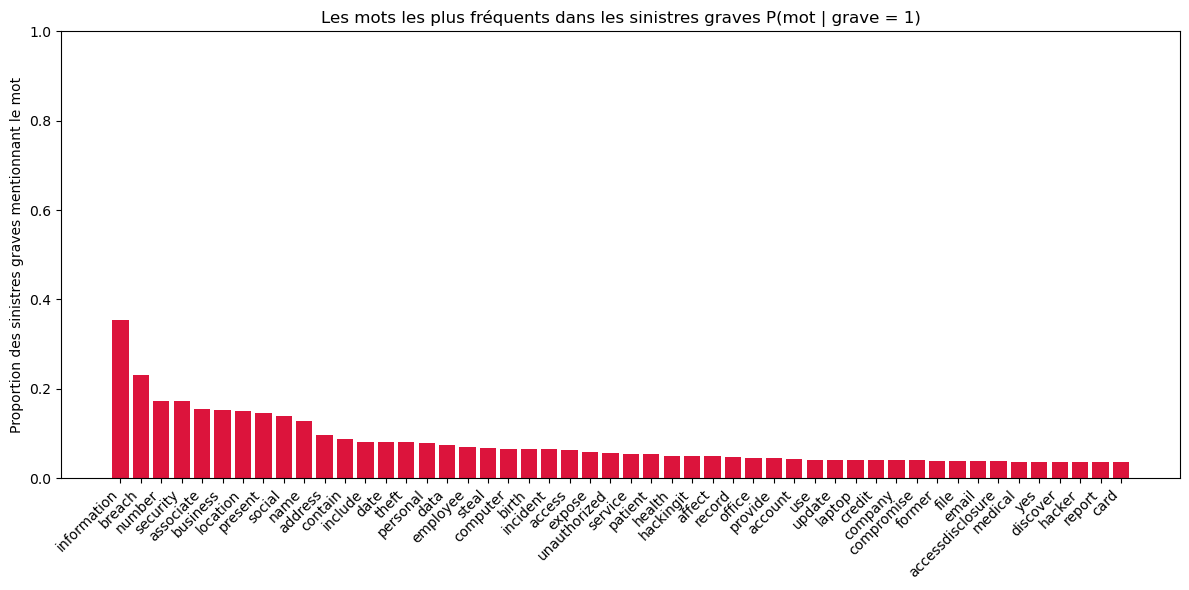

In [533]:
# Proportion de sinistre grave parmi les sinitres grave mentionnant un mot
# Les mots les plus fréquents dans les sinistres graves
df_freq['freq_mot_grave']= df_freq['nb_grave']/data_PRC_model.shape[0]
df_freq_top_grave = df_freq.sort_values(by='freq_mot_grave', ascending=False).head(50)

#  Tracer le graphique
plt.figure(figsize=(12, 6))
plt.bar(df_freq_top_grave['word'], df_freq_top_grave['freq_mot_grave'], color='crimson')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.ylabel("Proportion des sinistres graves mentionnant le mot")
plt.title("Les mots les plus fréquents dans les sinistres graves P(mot | grave = 1)")
plt.tight_layout()
plt.show()

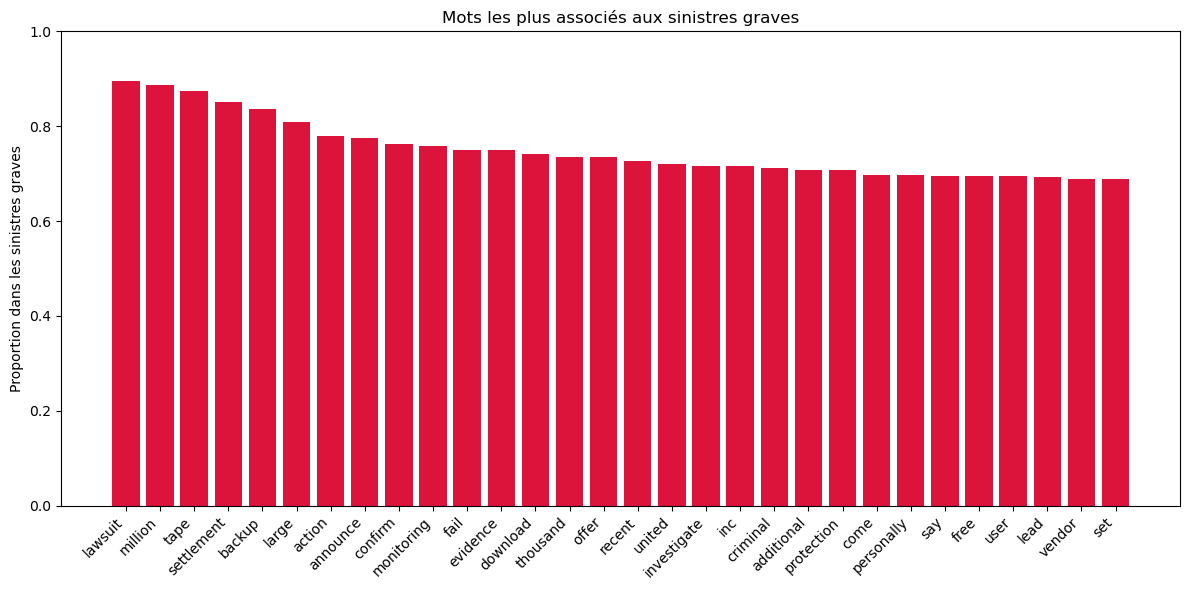

In [541]:
# Étape 4 : Calcul de la proportion de présence dans les sinistres graves
df_freq['prop_grave'] = df_freq['nb_grave'] / df_freq['total']

# Étape 5 : Filtrer les mots les plus fréquents (ex : au moins 20 sinistres)
df_top = df_freq[df_freq['total'] >= 40]

# Étape 6 : Prendre les 20 mots les plus "graves" (selon proportion)
df_top = df_top.sort_values(by='prop_grave', ascending=False).head(30)

# Étape 7 : Tracer le graphique
plt.figure(figsize=(12, 6))
plt.bar(df_top['word'], df_top['prop_grave'], color='crimson')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.ylabel("Proportion dans les sinistres graves")
plt.title("Mots les plus associés aux sinistres graves")
plt.tight_layout()
plt.show()

In [ ]:

# # Séparer les deux classes
# df_grave = data_PRC_model[data_PRC_model['niveau_gravite'] == 1]
# df_attritionnel = data_PRC_model[data_PRC_model['niveau_gravite'] == 0]

# # Fonction pour compter les mots une seule fois par sinistre
# def count_unique_words(word_lists):
#     all_words = []
#     for words in word_lists:
#         unique_words = set(words)  # ne garde qu’une fois chaque mot par sinistre
#         all_words.extend(unique_words)
#     return Counter(all_words)

# # Appliquer la fonction aux deux sous-groupes
# freq_grave = count_unique_words(df_grave['word'])
# freq_attritionnel = count_unique_words(df_attritionnel['word'])

# # Fusion des deux compteurs
# all_words = set(freq_grave.keys()).union(freq_attritionnel.keys())

# # Création du DataFrame final
# freq_df = pd.DataFrame({
#     'mot': list(all_words),
#     'nb_sinistres_graves': [freq_grave.get(word, 0) for word in all_words],
#     'nb_sinistres_attritionnels': [freq_attritionnel.get(word, 0) for word in all_words]
# })
# freq_df['total'] = freq_df['nb_sinistres_graves'] + freq_df['nb_sinistres_attritionnels']

# freq_df['part_grave'] = freq_df['nb_sinistres_graves'] / freq_df['total']
# freq_df['part_attritionnel'] = freq_df['nb_sinistres_attritionnels'] / freq_df['total']
# freq_df.sort_values(by='part_grave', ascending=False, inplace=True)

# freq_df[freq_df['total'] > 100].copy()  



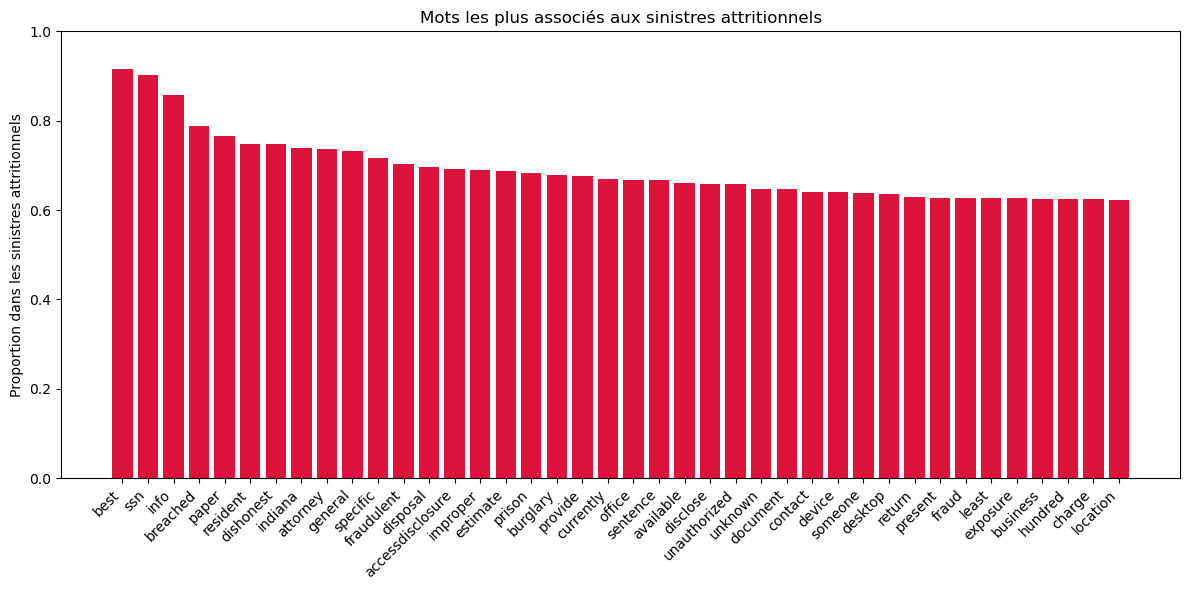

In [545]:
# Étape 4 : Calcul de la proportion de présence dans les sinistres graves
df_freq['prop_attr'] = df_freq['nb_attr'] / df_freq['total']

# Étape 5 : Filtrer les mots les plus fréquents (ex : au moins 20 sinistres)
df_top = df_freq[df_freq['total'] >= 60]

# Étape 6 : Prendre les 20 mots les plus "graves" (selon proportion)
df_top = df_top.sort_values(by='prop_attr', ascending=False).head(40)

# Étape 7 : Tracer le graphique
plt.figure(figsize=(12, 6))
plt.bar(df_top['word'], df_top['prop_attr'], color='crimson')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.ylabel("Proportion dans les sinistres attritionnels")
plt.title("Mots les plus associés aux sinistres attritionnels")
plt.tight_layout()
plt.show()

#### Séparer les données en ensembles d'entraînement et de test

In [546]:
data_PRC_model_new

,word,niveau_gravite
0,"[company, website, breach, around, hacker, att...",0
4,"[office, burglary, new, year, eve, result, los...",1
6,"[someone, purchase, hard, drive, immediately, ...",1
9,"[storeroom, window, saint, joseph, healthcare,...",0
15,"[hacker, hacker, able, intercept, customer, in...",0
...,...,...
9010,"[location, breach, information, theft, busines...",1
9011,"[location, breached, information, loss, busine...",1
9012,"[location, breach, information, theft, busines...",0
9013,"[location, breach, information, theft, busines...",0


In [547]:
from sklearn.model_selection import train_test_split
data_PRC_model_new= data_PRC_model.copy()
# Séparation des données et des labels
X = data_PRC_model_new['word']  # les listes de mots
y = data_PRC_model_new['niveau_gravite']  # les étiquettes (0 ou 1)

# Split : 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,           # assure une proportion équilibrée des classes
    random_state=42       # pour reproductibilité
)

# Tu peux aussi les regrouper dans des DataFrames
train_df = pd.DataFrame({'word': X_train, 'niveau_gravite': y_train})
test_df  = pd.DataFrame({'word': X_test,  'niveau_gravite': y_test})

In [550]:
data_PRC_model

,Date_Made_Public,Type_of_organization,Type_of_breach,Total_Records,Year_of_Breach,Description_of_incident,word,niveau_gravite
0,2006-03-03,BSF,HACK,88.0,2006,The company's website was breached sometime ar...,"[company, website, breach, around, hacker, att...",0
4,2012-03-12,MED,PORT,14000.0,2012,An office burglary on New Year's Eve 2011 resu...,"[office, burglary, new, year, eve, result, los...",1
6,2012-03-19,MED,DISC,30000.0,2012,Someone purchased a hard drive in September of...,"[someone, purchase, hard, drive, immediately, ...",1
9,2012-03-31,MED,PHYS,712.0,2012,A storeroom window at Saint Joseph's HealthCar...,"[storeroom, window, saint, joseph, healthcare,...",0
15,2012-04-09,BSR,HACK,1000.0,2012,A hacker or hackers were able to intercept cus...,"[hacker, hacker, able, intercept, customer, in...",0
...,...,...,...,...,...,...,...,...
9010,2009-11-20,MED,PHYS,5166.0,2009,Location of breached information: Theft\nBusin...,"[location, breach, information, theft, busines...",1
9011,2009-11-17,MED,PHYS,3800.0,2009,Location of breached information: Loss\nBusine...,"[location, breached, information, loss, busine...",1
9012,2009-10-30,MED,PHYS,501.0,2009,Location of breached information: Theft\nBusin...,"[location, breach, information, theft, busines...",0
9013,2009-10-28,MED,PHYS,1000.0,2009,Location of breached information: Theft\nBusin...,"[location, breach, information, theft, busines...",0


In [549]:
train_df

,word,niveau_gravite
1142,"[investigation, steal, social, security, check...",1
8125,"[location, breach, information, theft, busines...",1
3077,"[police, investigate, theft, personal, informa...",1
7572,"[location, breach, information, theft, busines...",1
8653,"[location, breach, information, theft, busines...",1
...,...,...
7587,"[location, breach, information, unauthorized, ...",0
7863,"[location, breach, information, theft, unautho...",1
7862,"[location, breach, information, unauthorized, ...",0
3523,"[report, health, human, service, theftlaptop, ...",0


In [ ]:
data_PRC_model_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6820 entries, 0 to 9014
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   word            6820 non-null   object
 1   niveau_gravite  6820 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 133.2+ KB


In [ ]:
data_PRC_model_new

,word,niveau_gravite
0,"[company, website, breached, sometime_around, ...",0
4,"[office_burglary, new, year, eve, resulted, lo...",1
6,"[someone, purchased, hard_drive, september, im...",1
9,"[storeroom, window, saint, joseph, healthcare,...",0
15,"[hacker, hacker_able, intercept, customer, inf...",0
...,...,...
9010,"[location_breached_information, theft_business...",1
9011,"[location_breached_information, loss_business_...",1
9012,"[location_breached_information, theft_business...",0
9013,"[location_breached_information, theft_business...",0


####  Word2Vec avec Gensim proprement dit

In [ ]:
data_pretrained

[['company',
  'website',
  'breached',
  'sometime_around',
  'february',
  'hacker',
  'attempt',
  'gain_access',
  'certain',
  'customer',
  'private',
  'information',
  'social_security_number',
  'name',
  'address',
  'bank_account',
  'name',
  'bank_account',
  'number',
  'may',
  'compromised',
  'least',
  'individual',
  'affected'],
 ['office_burglary',
  'new',
  'year',
  'eve',
  'resulted',
  'loss',
  'hardware',
  'contained',
  'sensitive',
  'personal',
  'information',
  'full',
  'name',
  'address',
  'social_security_number',
  'medical',
  'information',
  'client',
  'hardware',
  'impairment',
  'resource',
  'notified',
  'patient',
  'february',
  'filed',
  'bankruptcy',
  'march',
  'high',
  'cost',
  'handling',
  'breach',
  'led',
  'directly',
  'decision',
  'file',
  'bankruptcy'],
 ['someone',
  'purchased',
  'hard_drive',
  'september',
  'immediately',
  'notified',
  'law_enforcement',
  'contained',
  'confidential',
  'information',
  'e

In [ ]:
#word2vec
from gensim.models import Word2Vec
modele = Word2Vec(data_pretrained,min_count=1,vector_size=2,window=5)

In [ ]:
#propriété "wv" -> wordvector
words = modele.wv

#affichage des termes de leur index
words.key_to_index

{'information': 0,
 'location_breached_information': 1,
 'number': 2,
 'present': 3,
 'employee': 4,
 'patient': 5,
 'name': 6,
 'breach': 7,
 'social_security_number': 8,
 'data': 9,
 'may': 10,
 'address': 11,
 'personal': 12,
 'computer': 13,
 'stolen': 14,
 'laptop': 15,
 'affected': 16,
 'service': 17,
 'theft_business_associate': 18,
 'exposed': 19,
 'email': 20,
 'contained': 21,
 'customer': 22,
 'unauthorized_accessdisclosure_business_associate': 23,
 'name_social_security': 24,
 'included': 25,
 'account': 26,
 'student': 27,
 'record': 28,
 'company': 29,
 'security_breach_provided': 30,
 'file': 31,
 'present_yes': 32,
 'hackingit_incident_business_associate': 33,
 'people': 34,
 'office_indiana_attorney_general': 35,
 'system': 36,
 'used': 37,
 'also': 38,
 'individual': 39,
 'security': 40,
 'discovered': 41,
 'health': 42,
 'university': 43,
 'theft': 44,
 'containing': 45,
 'state': 46,
 'hacker': 47,
 'medical': 48,
 'one': 49,
 'million': 50,
 'access': 51,
 'former'

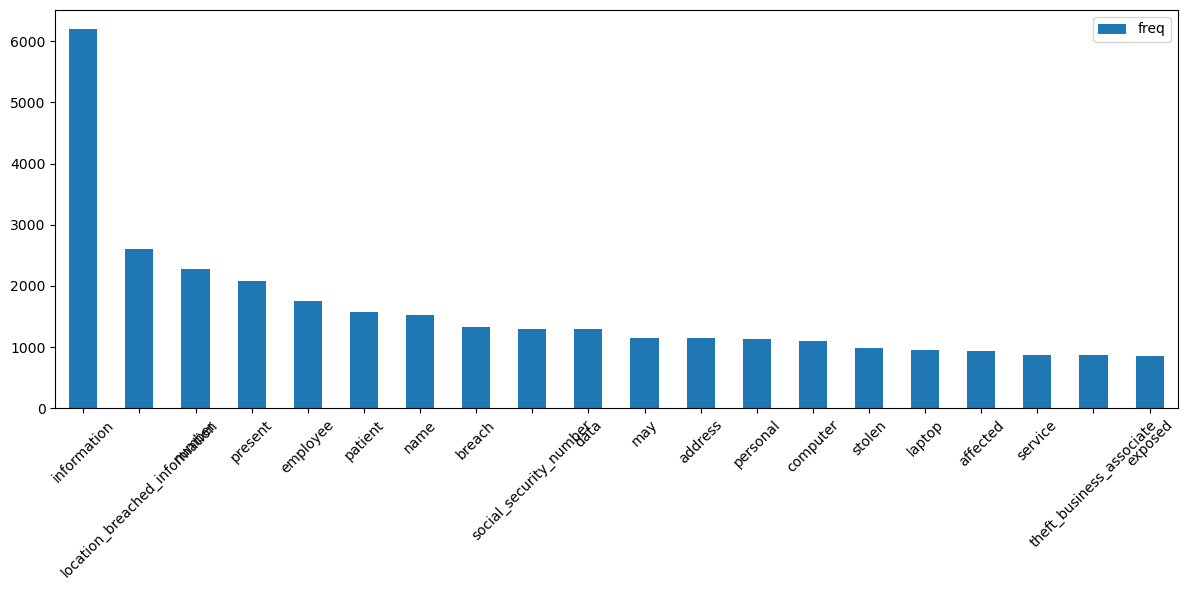

In [ ]:
# initialisation de l'histogramme
freq = dict()
for v in list(words.index_to_key):
    freq[v] = 0
    
# comptage des occurrences
for d in data_pretrained:
    for w in d:
        freq[w] += 1

d=dict(list(freq.items())[:20])
df1 = pd.DataFrame({'freq':d.values()}, index=d.keys())

ax = df1.plot.bar(rot=45,figsize=(12, 6))
ax.tick_params(axis='x', labelsize=10)  # ajuster la taille des étiquettes
plt.tight_layout()
plt.show()

In [ ]:
#coordonnées 
vec2 = words['social_security']
print(vec2)
vec1 = words['information']
print(vec1)

[ 0.513604  -2.9358015]
[-0.06517803 -7.788185  ]


In [ ]:
print(np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2)))

0.983563


In [ ]:
#similarité de gensim
words.similarity('information','social_security')

0.98356307

In [ ]:
#les termes les plus proches de "boring"
words.most_similar("social_security",topn=20)

[('marital_status', 1.0),
 ('journal', 1.0),
 ('microfilm', 0.9999999403953552),
 ('gang', 0.9999998211860657),
 ('authority_believe', 0.9999997019767761),
 ('deaconess', 0.999999463558197),
 ('pioneer', 0.999999463558197),
 ('nios', 0.9999994039535522),
 ('patrice', 0.9999990463256836),
 ('questionable', 0.9999989867210388),
 ('areasfor', 0.9999985694885254),
 ('acquire', 0.9999980926513672),
 ('proper', 0.9999977946281433),
 ('radiological', 0.999996542930603),
 ('donor', 0.9999957084655762),
 ('othersupdate', 0.9999954104423523),
 ('biological', 0.9999940991401672),
 ('document', 0.9999937415122986),
 ('supply', 0.9999931454658508),
 ('excellus', 0.9999926686286926)]

In [ ]:
#les termes les plus proches de "boring"
words.most_similar("location",topn=20)

[('counterfeit', 1.0000001192092896),
 ('congressional', 1.0),
 ('coconspirator', 1.0),
 ('human_error', 0.9999999403953552),
 ('technical', 0.9999999403953552),
 ('planet', 0.9999999403953552),
 ('token', 0.9999999403953552),
 ('prove', 0.9999998807907104),
 ('suing', 0.9999997019767761),
 ('kansan', 0.9999997019767761),
 ('stolen_locked', 0.9999995827674866),
 ('maine', 0.9999995827674866),
 ('since', 0.999999463558197),
 ('program', 0.9999992847442627),
 ('deadline', 0.9999992251396179),
 ('emailed', 0.9999991655349731),
 ('published', 0.9999991059303284),
 ('participant', 0.9999988079071045),
 ('wired', 0.9999987483024597),
 ('stated', 0.9999986290931702)]

In [ ]:
# récupérer les données dans un data frame
df = pd.DataFrame(words.vectors,columns=['V1','V2'],index=words.key_to_index.keys())
print(df)

                                     V1         V2
information                   -0.065178  -7.788185
location_breached_information  7.236681  -3.281141
number                        -1.604274 -10.592167
present                        6.497528  -2.795682
employee                       0.241862  -6.319359
...                                 ...        ...
coo                            0.206745   0.240428
employe                       -0.219255  -0.432989
imagined                       0.108323  -0.403136
playlist                       0.373623  -0.366868
weekequifax                   -0.411829   0.072042

[11158 rows x 2 columns]


In [ ]:
#quelques mots clés
mots = ['breach_involving','social_security','debit_numbers','numbers_ssns','protected_health','provided','involving_unauthorized']
dfMots = df.loc[mots,:]
print(dfMots)

KeyError: "['breach_involving', 'debit_numbers', 'numbers_ssns', 'involving_unauthorized'] not in index"

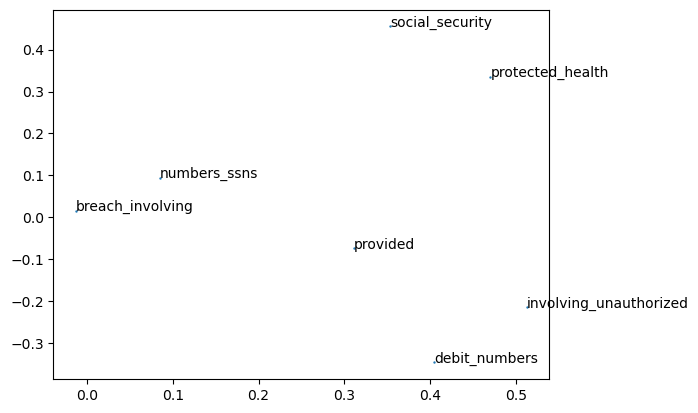

In [ ]:
#graphique dans le plan
import matplotlib.pyplot as plt
plt.scatter(dfMots.V1,dfMots.V2,s=0.5)
for i in range(dfMots.shape[0]):
    plt.annotate(dfMots.index[i],(dfMots.V1[i],dfMots.V2[i]))
plt.show()

## Entraînement du modèle Word2Vec

Le code suivant optimise  avec un GridSearch manuel sur les hyperparamètres epochs, negative, et alpha pour entraîner Word2Vec sur l'ensemble du jeu de données, puis entraîner un Perceptron multicouche (MLP) en Keras, en évaluant les performances avec le F1-score.

#### GridSearch sur Word2Vec avec les meilleurs paramètres min_count=1, negative, epochs

In [ ]:
# ==== 1. data_PRC_model_new : un DataFrame avec deux colonnes : 'word' (liste de tokens) et 'niveau_gravite' (0 ou 1)

# ==== 2. Séparer les données en train et test ====
train_df, test_df = train_test_split(
    data_PRC_model_new,
    test_size=0.2,
    stratify=data_PRC_model_new['niveau_gravite'],
    random_state=42
)

# ==== 3. Fonction de vectorisation : moyenne des vecteurs de mots ====
def vectorize(sentences, model, size):
    vectors = []
    for sentence in sentences:
        word_vecs = [model.wv[word] for word in sentence if word in model.wv]
        if word_vecs:
            vectors.append(np.mean(word_vecs, axis=0))
        else:
            vectors.append(np.zeros(size))
    return np.array(vectors)

# ==== 4. Grille des hyperparamètres à tester ====
param_grid = {
    'epochs': [5, 10,15, 20, 25, 30],
    'negative': [5],
    'alpha': [0.01, 0.03, 0.05, 0.07, 0.09]
}
grid = list(itertools.product(param_grid['epochs'], param_grid['negative'], param_grid['alpha']))

results = []

# ==== 5. GridSearch sur Word2Vec ====
for ep, neg, al in grid:
    print(f"\n🔁 Training Word2Vec with epochs={ep}, negative={neg}, alpha={al}")

    # Entraînement Word2Vec sur TOUTES les données
    w2v_model = Word2Vec(
        sentences=train_df['word'].tolist(), # liste de listes de tokens base de train_df
        vector_size=100,
        window=10,  # taille de la fenêtre
        min_count=5,  # minimum de 5 occurrences pour un mot
        sg=1,  # skip-gram
        epochs=ep, 
        negative=neg,
        alpha=al
    )

    # Vectorisation des phrases
    X_train = vectorize(train_df['word'], w2v_model, 100)
    X_test = vectorize(test_df['word'], w2v_model, 100)
    y_train = train_df['niveau_gravite'].values
    y_test = test_df['niveau_gravite'].values

    # Normalisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Encodage pour Keras (softmax)
    y_train_cat = to_categorical(y_train, num_classes=2)
    y_test_cat = to_categorical(y_test, num_classes=2)

    # ==== 6. Modèle de classification (MLP avec Keras) ====
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(100,)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # Sortie binaire

    # Compilation
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Entraînement
    model.fit(X_train_scaled, y_train_cat, epochs=10, batch_size=32, verbose=0)

    # Prédiction
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Évaluation avec F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1-score: {f1:.4f}")

    results.append(((ep, neg, al), f1))

# ==== 7. Meilleurs paramètres ====
best_params, best_f1 = max(results, key=lambda x: x[1])
print(f"\n✅ Best params: epochs={best_params[0]}, negative={best_params[1]}, alpha={best_params[2]}")
print(f"🎯 Best F1-score: {best_f1:.4f}")



🔁 Training Word2Vec with epochs=5, negative=5, alpha=0.01
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
F1-score: 0.8138

🔁 Training Word2Vec with epochs=5, negative=5, alpha=0.03


KeyboardInterrupt: 

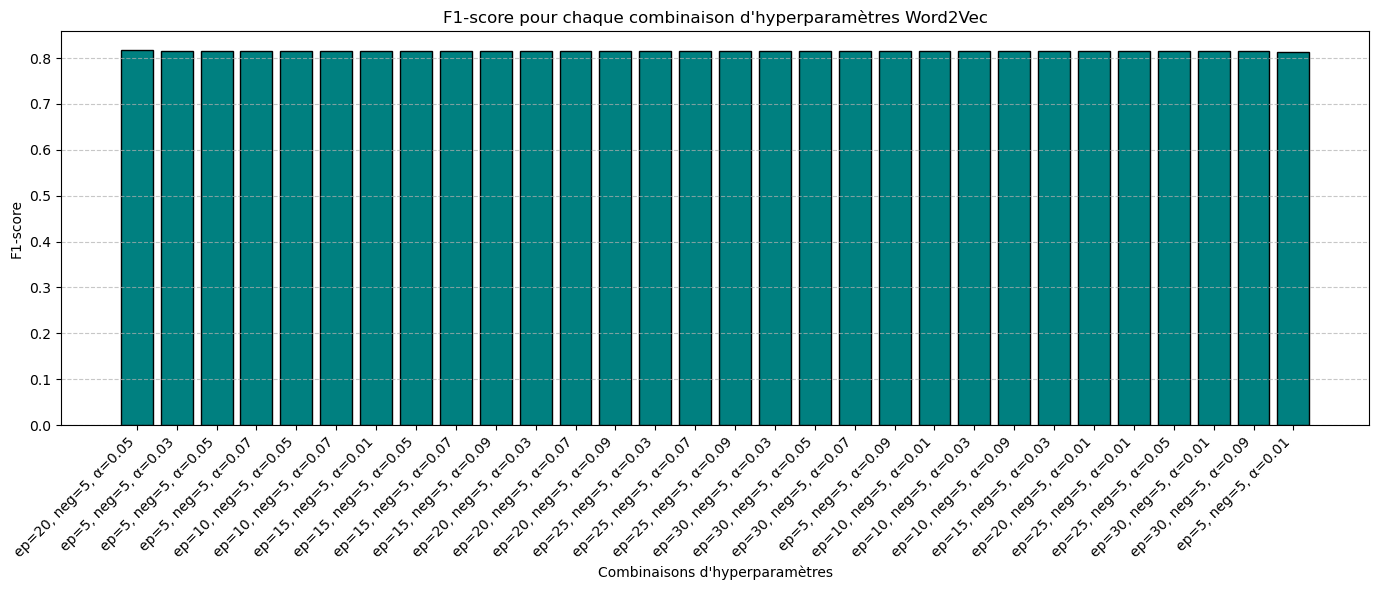

In [ ]:
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)
labels = [f"ep={ep}, neg={neg}, α={alpha}" for (ep, neg, alpha), _ in sorted_results]
scores = [f1 for _, f1 in sorted_results]

# Tracer le graphique
plt.figure(figsize=(14, 6))
plt.bar(labels, scores, color='teal', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Combinaisons d'hyperparamètres")
plt.ylabel("F1-score")
plt.title("F1-score pour chaque combinaison d'hyperparamètres Word2Vec")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### GridSearch sur Word2Vec avec Keras sur le min_count et fenêtre de contexte


In [ ]:
# ==== 1. data_PRC_model_new : un DataFrame avec deux colonnes : 'word' (liste de tokens) et 'niveau_gravite' (0 ou 1)

# ==== 2. Séparer les données en train et test ====
train_df, test_df = train_test_split(
    data_PRC_model_new,
    test_size=0.2,
    stratify=data_PRC_model_new['niveau_gravite'],
    random_state=42
)

# ==== 3. Fonction de vectorisation : moyenne des vecteurs de mots ====
def vectorize(sentences, model, size):
    vectors = []
    for sentence in sentences:
        word_vecs = [model.wv[word] for word in sentence if word in model.wv]
        if word_vecs:
            vectors.append(np.mean(word_vecs, axis=0))
        else:
            vectors.append(np.zeros(size))
    return np.array(vectors)

# ==== 4. Grille des hyperparamètres à tester ====
param_grid = {
    'min_count': [5, 10,15, 20, 25, 30],
    'window': [5, 10, 15, 20],
}
grid = list(itertools.product(param_grid['min_count'], param_grid['window']))

results = []

# ==== 5. GridSearch sur Word2Vec ====
for m_c, w_d in grid:
    print(f"\n🔁 Training Word2Vec with min_count={m_c}, window={w_d}")

    # Entraînement Word2Vec sur TOUTES les données
    w2v_model = Word2Vec(
        sentences=data_PRC_model_new['word'].tolist(),
        vector_size=100,
        window=w_d,  # taille de la fenêtre
        min_count=m_c,  # minimum de 5 occurrences pour un mot
        sg=1,  # skip-gram
        epochs=20,
        negative=10,
        alpha=0.01  )

    # Vectorisation des phrases
    X_train = vectorize(train_df['word'], w2v_model, 100)
    X_test = vectorize(test_df['word'], w2v_model, 100)
    y_train = train_df['niveau_gravite'].values
    y_test = test_df['niveau_gravite'].values

    # Normalisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Encodage pour Keras (softmax)
    y_train_cat = to_categorical(y_train, num_classes=2)
    y_test_cat = to_categorical(y_test, num_classes=2)

    # ==== 6. Modèle de classification (MLP avec Keras) ====
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(100,)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # Sortie binaire

    # Compilation
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Entraînement
    model.fit(X_train_scaled, y_train_cat, epochs=10, batch_size=32, verbose=0)

    # Prédiction
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Évaluation avec F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1-score: {f1:.4f}")

    results.append(((m_c, w_d), f1))

# ==== 7. Meilleurs paramètres ====
best_params, best_f1 = max(results, key=lambda x: x[1])
print(f"\n✅ Best params: min_count={best_params[0]}, window={best_params[1]}")
print(f"🎯 Best F1-score: {best_f1:.4f}")



🔁 Training Word2Vec with min_count=5, window=5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
F1-score: 0.8162

🔁 Training Word2Vec with min_count=5, window=10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
F1-score: 0.8150

🔁 Training Word2Vec with min_count=5, window=15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
F1-score: 0.8150

🔁 Training Word2Vec with min_count=5, window=20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
F1-score: 0.8162

🔁 Training Word2Vec with min_count=10, window=5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
F1-score: 0.8085

🔁 Training Word2Vec with min_count=10, window=10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
F1-score: 0.8175

🔁 Training Word2Vec with min_count=10, window=15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
F1-score: 0.8150

🔁 Training Word2Vec with min_count=10, window=20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
F1-score: 0.8150

🔁 Training Word2Vec with min_count=15, window=5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
F1-score: 0.8150

🔁 Training Word2Vec with min_count=15, window=10
27/

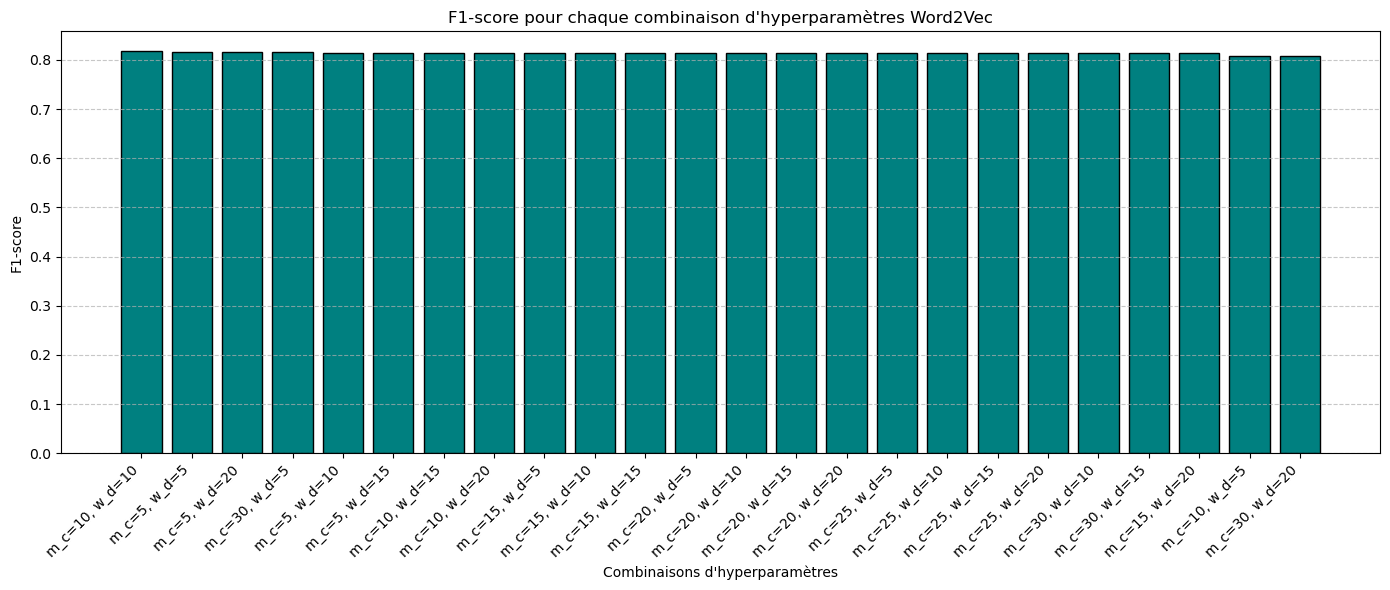

In [ ]:
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)
labels = [f"m_c={m_c}, w_d={w_d}" for (m_c, w_d), _ in sorted_results]
scores = [f1 for _, f1 in sorted_results]

# Tracer le graphique
plt.figure(figsize=(14, 6))
plt.bar(labels, scores, color='teal', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Combinaisons d'hyperparamètres")
plt.ylabel("F1-score")
plt.title("F1-score pour chaque combinaison d'hyperparamètres Word2Vec")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### GridSearche sur la taille du vecteur

In [ ]:
# ==== 1. data_PRC_model_new : un DataFrame avec deux colonnes : 'word' (liste de tokens) et 'niveau_gravite' (0 ou 1)

# ==== 2. Séparer les données en train et test ====
train_df, test_df = train_test_split(
    data_PRC_model_new,
    test_size=0.2,
    stratify=data_PRC_model_new['niveau_gravite'],
    random_state=42
)

# ==== 3. Fonction de vectorisation : moyenne des vecteurs de mots ====
def vectorize(sentences, model, size):
    vectors = []
    for sentence in sentences:
        word_vecs = [model.wv[word] for word in sentence if word in model.wv]
        if word_vecs:
            vectors.append(np.mean(word_vecs, axis=0))
        else:
            vectors.append(np.zeros(size))
    return np.array(vectors)

# ==== 4. Grille des hyperparamètres à tester ====
param_grid = {
    'vector_size': [100, 150, 200, 250, 300],
}
grid = list(itertools.product(param_grid['vector_size']))

results = []

# ==== 5. GridSearch sur Word2Vec ====
for V_s in [100, 150, 200, 250, 300]:
    print(f"\n🔁 Training Word2Vec with min_count={V_s}")

    # Entraînement Word2Vec sur TOUTES les données
    w2v_model = Word2Vec(
        sentences=data_PRC_model_new['word'].tolist(),
        vector_size=V_s,
        window=10,  # taille de la fenêtre
        min_count=10,  # minimum de 5 occurrences pour un mot
        sg=1,  # skip-gram
        epochs=20,
        negative=10,
        alpha=0.01  )

    # Vectorisation des phrases
    X_train = vectorize(train_df['word'], w2v_model, V_s)
    X_test = vectorize(test_df['word'], w2v_model, V_s)
    y_train = train_df['niveau_gravite'].values
    y_test = test_df['niveau_gravite'].values

    # Normalisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Encodage pour Keras (softmax)
    y_train_cat = to_categorical(y_train, num_classes=2)
    y_test_cat = to_categorical(y_test, num_classes=2)

    # ==== 6. Modèle de classification (MLP avec Keras) ====
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(V_s,)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # Sortie binaire

    # Compilation
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Entraînement
    model.fit(X_train_scaled, y_train_cat, epochs=10, batch_size=32, verbose=0)

    # Prédiction
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Évaluation avec F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1-score: {f1:.4f}")

    results.append(((V_s), f1))

# ==== 7. Meilleurs paramètres ====
best_params, best_f1 = max(results, key=lambda x: x[1])
print(f"\n✅ Best params: vector_size={best_params}")
print(f"🎯 Best F1-score: {best_f1:.4f}")



🔁 Training Word2Vec with min_count=100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
F1-score: 0.8150

🔁 Training Word2Vec with min_count=150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
F1-score: 0.8162

🔁 Training Word2Vec with min_count=200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
F1-score: 0.8162

🔁 Training Word2Vec with min_count=250
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
F1-score: 0.8150

🔁 Training Word2Vec with min_count=300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
F1-score: 0.8162

✅ Best params: vector_size=150
🎯 Best F1-score: 0.8162


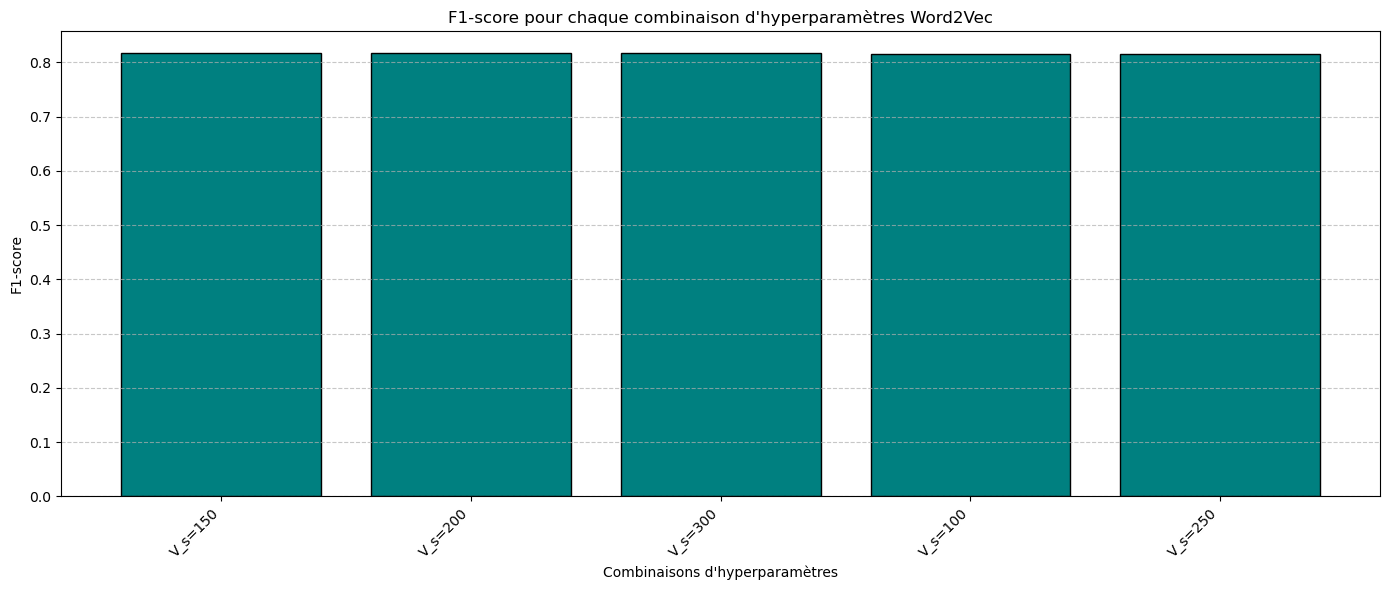

In [ ]:
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)
labels = [f"V_s={V_s}" for (V_s), _ in sorted_results]
scores = [f1 for _, f1 in sorted_results]

# Tracer le graphique
plt.figure(figsize=(14, 6))
plt.bar(labels, scores, color='teal', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Combinaisons d'hyperparamètres")
plt.ylabel("F1-score")
plt.title("F1-score pour chaque combinaison d'hyperparamètres Word2Vec")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Modele Word2Vec avec les meilleurs paramètres

In [ ]:
data_PRC_model.columns

Index(['Date_Made_Public', 'Type_of_organization', 'Type_of_breach',
       'Total_Records', 'Year_of_Breach', 'Description_of_incident', 'word',
       'niveau_gravite'],
      dtype='object')

In [ ]:
data_PRC_model_new= data_PRC_model[['word', 'niveau_gravite','Total_Records','Type_of_organization','Type_of_breach']].copy()
# ==== 2. Séparer les données en train et test ====
train_df, test_df = train_test_split(
    data_PRC_model_new,
    test_size=0.2,
    stratify=data_PRC_model_new['niveau_gravite'],
    random_state=42
)

# ==== 3. Fonction de vectorisation : moyenne des vecteurs de mots ====
def vectorize(sentences, model, size):
    vectors = []
    for sentence in sentences:
        word_vecs = [model.wv[word] for word in sentence if word in model.wv]
        if word_vecs:
            vectors.append(np.mean(word_vecs, axis=0))
        else:
            vectors.append(np.zeros(size))
    return np.array(vectors)


# Entraînement Word2Vec sur TOUTES les données
w2v_model = Word2Vec(
    sentences=data_PRC_model_new['word'].tolist(),# Train_df['word'] 
    vector_size=150,
    window=10,  # taille de la fenêtre
    min_count=10,  # minimum de 5 occurrences pour un mot
    sg=1,  # skip-gram
    epochs=20,
    negative=10,
    alpha=0.01  )

# Vectorisation des phrases
X_train = vectorize(train_df['word'], w2v_model, 150)
X_test = vectorize(test_df['word'], w2v_model, 150)
y_train = train_df['niveau_gravite'].values
y_test = test_df['niveau_gravite'].values

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encodage pour Keras (softmax)
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# ==== 6. Modèle de classification (MLP avec Keras) ====
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(150,)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Sortie binaire

# Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement
model.fit(X_train_scaled, y_train_cat, epochs=10, batch_size=32, verbose=0)

# Prédiction
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Évaluation avec F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
F1-score: 0.6750


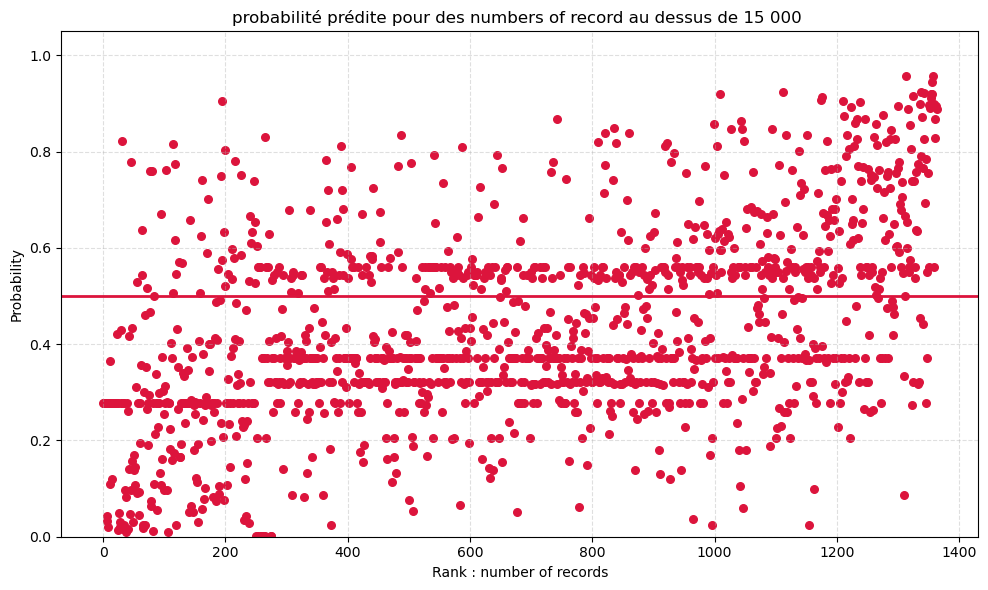

In [ ]:
test_df = test_df.copy()  # pour ne pas modifier l'original
test_df['prob_grave'] = y_pred_prob[:, 1]  # probabilité prédite d'être "grave" (classe 1)

# Trier selon le nombre de records ou proxy du rang
test_df_sorted = test_df.sort_values(by='Total_Records').reset_index(drop=True)


#test_df_sorted=test_df_sorted[test_df_sorted['Total_Records']>300000]
# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.scatter(test_df_sorted.index, test_df_sorted['prob_grave'], color='crimson', s=30)

# Ligne de seuil à 0.5
plt.axhline(0.5, color='crimson', linewidth=2)

# Paramètres du graphique
plt.ylim(0, 1.05)
plt.xlabel("Rank : number of records")
plt.ylabel("Probability")
plt.title("probabilité prédite pour des numbers of record au dessus de 15 000 ")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


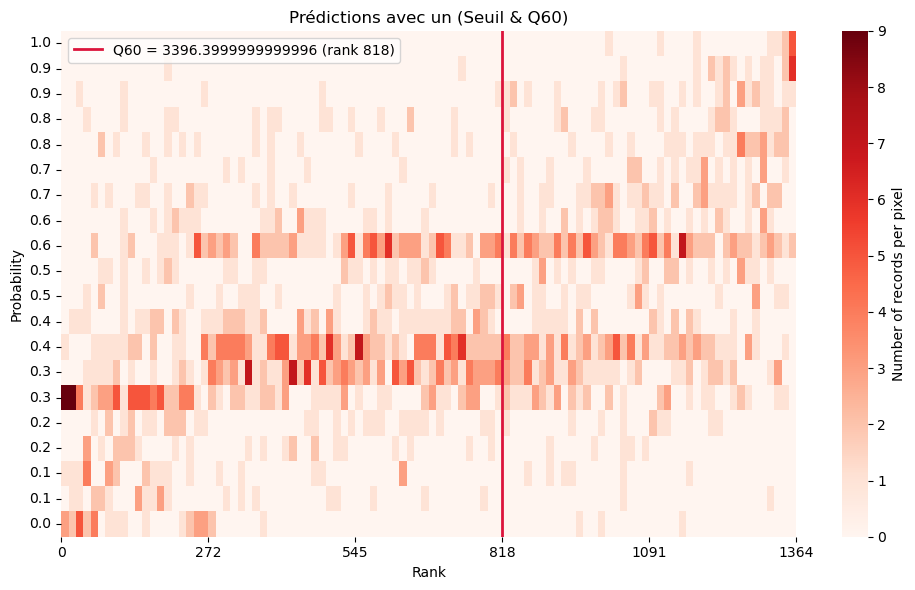

In [ ]:
# --- 1. Ajout des probabilités prédites dans test_df ---
test_df = test_df.copy()
test_df['prob_grave'] = y_pred_prob[:, 1]  # Proba d'être dans la classe grave (1)

# --- 2. Tri des données par Total_Records ---
test_df_sorted = test_df.sort_values(by='Total_Records').reset_index(drop=True)

# --- 3. Binning pour heatmap ---
rank_bins = 100
prob_bins = 20

test_df_sorted['rank_bin'] = pd.cut(test_df_sorted.index, bins=rank_bins, labels=False)
test_df_sorted['prob_bin'] = pd.cut(test_df_sorted['prob_grave'], bins=prob_bins, labels=False)

# --- 4. Matrice de comptage inversée (Y croissant vers le haut) ---
heatmap_data = np.zeros((prob_bins, rank_bins))
for _, row in test_df_sorted.iterrows():
    if not np.isnan(row['rank_bin']) and not np.isnan(row['prob_bin']):
        i = int(row['prob_bin'])
        j = int(row['rank_bin'])
        heatmap_data[prob_bins - 1 - i, j] += 1

# --- 5. Calcul du rang exact pour Q60 = 1168 ---
q60_value = Q40
q60_rank = test_df_sorted[test_df_sorted['Total_Records'] >= q60_value].index[0]

# --- 6. Étiquettes Y dans l'ordre croissant ---
ytick_labels = [f"{p:.1f}" for p in np.linspace(0, 1, prob_bins)][::-1]

# --- 7. Affichage du heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    cmap="Reds",  # Couleur tendant vers le rouge/crimson
    cbar_kws={'label': 'Number of records per pixel'},
    yticklabels=ytick_labels
)

# --- 8. Lignes verticales pour seuils ---
plt.axvline(x=q60_rank * rank_bins / len(test_df_sorted), color='crimson', linestyle='-', linewidth=2, label=f'Q60 = {q60_value} (rank {q60_rank})')

# --- 9. Ticks et labels ---
plt.xticks(
    ticks=np.linspace(0, rank_bins, 6),
    labels=[f"{int(t)}" for t in np.linspace(0, len(test_df_sorted), 6)],
    rotation=0
)
plt.yticks(rotation=0)

plt.title("Prédictions avec un (Seuil & Q60)")
plt.xlabel("Rank")
plt.ylabel("Probability")

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


#### Coordonnées des documents à partir des termes


In [ ]:
#fonction pour transformer un document en vecteur
#à partir des tokens qui le composent
#entrée : doc à traiter
#         modèle préentrainé
#sortie : vecteur représentant le document
def my_doc_2_vec(doc,trained):
    #dimension de représentation
    p = trained.vectors.shape[1]
    #initialiser le vecteur
    vec = np.zeros(p)
    #nombre de tokens trouvés
    nb = 0
    #traitement de chaque token du document
    for tk in doc:
        #ne traiter que les tokens reconnus
        try:
            values = trained[tk]
            vec = vec + values
            nb = nb + 1.0
        except:
            pass
    #faire la moyenne des valeurs
    #uniquement si on a trové des tokens reconnus bien sûr
    if (nb > 0.0):
        vec = vec/nb
    #renvoyer le vecteur
    #si aucun token trouvé, on a un vecteur de valeurs nulles
    return vec

In [ ]:
#traiter les documents du corpus corpus
docsVec = list()
#pour chaque document du corpus nettoyé
for doc in trigrams:
    #calcul de son vecteur
    vec = my_doc_2_vec(doc,words)
    #ajouter dans la liste
    docsVec.append(vec)
#transformer en matrice numpy
matVec = np.array(docsVec)
print(matVec.shape)

(100, 2)


In [ ]:
#transformer en data frame
df2 = pd.DataFrame(matVec,columns=["v"+str(i+1) for i in range(matVec.shape[1])])
df2['label'] = D.label
df2.head()

NameError: name 'D' is not defined

<Axes: xlabel='v1', ylabel='v2'>

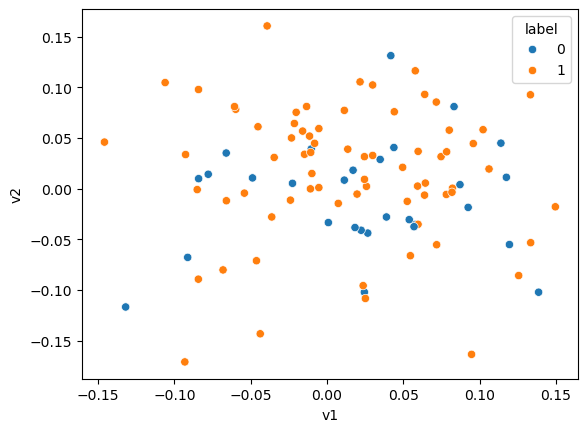

In [ ]:
#refaire le graphique avec la polarité
sns.scatterplot(data=df2,x='v1',y='v2',hue='label')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       100 non-null    object 
 1   organization_type        100 non-null    object 
 2   incident_details         100 non-null    object 
 3   breach_type              100 non-null    object 
 4   reported_date            100 non-null    object 
 5   breach_date              100 non-null    object 
 6   end_breach_date          100 non-null    object 
 7   total_affected           48 non-null     float64
 8   residents_affected       100 non-null    object 
 9   breach_location_city     100 non-null    object 
 10  breach_location_state    100 non-null    object 
 11  breach_location_country  100 non-null    object 
dtypes: float64(1), object(11)
memory usage: 9.5+ KB


# Doc2Vec avec gensim

In [ ]:
# Réorganiser la base de données 
D = df3[['incident_details', 'total_affected']].copy()  # on extrait les colonnes utiles
D['id'] = range(1, len(D) + 1)  # création de la colonne id de 1 à N

# Définir un seuil K
# Quantile 60%
K = df['total_affected'].quantile(0.6)

# Remplacer les valeurs manquantes (NaN) dans total_affected par 0 ou 1 aléatoirement
D['total_affected'] = D['total_affected'].apply(
    lambda x: x if pd.notnull(x) else np.random.choice(range(1, int(max(df['total_affected']))))
)
# Création de la variable label
D['label'] = (D['total_affected'] > K).astype(int)  # 1 si > K, sinon 0

# Remplacer les valeurs manquantes (NaN) dans total_affected par 0 ou 1 aléatoirement
D['total_affected'] = D['total_affected'].apply(
    lambda x: x if pd.notnull(x) else np.random.choice([0, 1])
)

In [ ]:
# Réorganiser les colonnes 
D = D[['id', 'incident_details', 'label']]

# Affichage
D

,id,incident_details,label
0,1,The Indiana Office of the Attorney General rep...,1
1,2,"On February 25, 2021, the Maryland Office of t...",0
2,3,The California Office of the Attorney General ...,1
3,4,"On October 9, 2018, the Minnesota Department o...",1
4,5,The Montana Department of Justice reported on ...,1
...,...,...,...
95,96,The Montana Department of Justice reported a d...,1
96,97,The California Office of the Attorney General ...,1
97,98,The California Office of the Attorney General ...,1
98,99,The Maine Office of the Attorney General repor...,1


In [ ]:
#tagger les documents avec leur identifiant
from gensim.models.doc2vec import TaggedDocument
tagged_docs = [TaggedDocument(words=trigrams[i],tags=["d"+str(D.id[i])]) for i in range(len(trigrams))]

#premier doc par ex.
print(tagged_docs[0])

TaggedDocument<['indiana_office', 'attorney_general_reported', 'des', 'moines', 'area', 'community_college', 'experienced_data_breach_affecting', 'total', '1,976', 'individuals', '11', 'residents_indiana', 'breach_notification', 'reported'], ['d1']>


In [ ]:
tagged_docs[1]

TaggedDocument(words=['maryland_office', 'attorney_general_reported_data', 'breach_involving', 'wms', 'partners', 'llc', 'occurred_due', 'phishing', 'breach_affected', '383', 'maryland_residents', 'potentially_compromising', 'personal_information', 'names', 'physical', 'addresses', 'account_numbers', 'last', 'four', 'digits', 'social_security', 'numbers', 'dates_birth', 'driver_’', 'license_numbers'], tags=['d2'])

In [ ]:
#doc2vec
from gensim.models.doc2vec import Doc2Vec
modeleDoc = Doc2Vec(vector_size=2,min_count=1,window=5)

#construction de dictionnaire dans un premier temps
modeleDoc.build_vocab(tagged_docs)

In [ ]:
#coordonnées des termes - comme avec doc2vec
pd.DataFrame(modeleDoc.wv.vectors,columns=['V1','V2'],index=modeleDoc.wv.key_to_index.keys())

,V1,V2
breach_involving,-0.026811,0.011822
consumer_affairs,0.255167,0.450464
massachusetts_office,-0.465147,-0.355840
social_security,0.322944,0.448649
business_regulation_reported_data,-0.250771,-0.188169
...,...,...
west,0.320888,0.471904
virginia,0.352764,0.337748
claims,0.065008,-0.490215
government,0.229388,-0.026911


In [ ]:
#modélisation pour le positionnement des documents
modeleDoc.train(tagged_docs,total_examples=modeleDoc.corpus_count,epochs=100)
print(modeleDoc.dv)

KeyedVectors<vector_size=2, 100 keys>


In [ ]:
#coordonnées des documents
print(modeleDoc.dv.key_to_index)

{'d1': 0, 'd2': 1, 'd3': 2, 'd4': 3, 'd5': 4, 'd6': 5, 'd7': 6, 'd8': 7, 'd9': 8, 'd10': 9, 'd11': 10, 'd12': 11, 'd13': 12, 'd14': 13, 'd15': 14, 'd16': 15, 'd17': 16, 'd18': 17, 'd19': 18, 'd20': 19, 'd21': 20, 'd22': 21, 'd23': 22, 'd24': 23, 'd25': 24, 'd26': 25, 'd27': 26, 'd28': 27, 'd29': 28, 'd30': 29, 'd31': 30, 'd32': 31, 'd33': 32, 'd34': 33, 'd35': 34, 'd36': 35, 'd37': 36, 'd38': 37, 'd39': 38, 'd40': 39, 'd41': 40, 'd42': 41, 'd43': 42, 'd44': 43, 'd45': 44, 'd46': 45, 'd47': 46, 'd48': 47, 'd49': 48, 'd50': 49, 'd51': 50, 'd52': 51, 'd53': 52, 'd54': 53, 'd55': 54, 'd56': 55, 'd57': 56, 'd58': 57, 'd59': 58, 'd60': 59, 'd61': 60, 'd62': 61, 'd63': 62, 'd64': 63, 'd65': 64, 'd66': 65, 'd67': 66, 'd68': 67, 'd69': 68, 'd70': 69, 'd71': 70, 'd72': 71, 'd73': 72, 'd74': 73, 'd75': 74, 'd76': 75, 'd77': 76, 'd78': 77, 'd79': 78, 'd80': 79, 'd81': 80, 'd82': 81, 'd83': 82, 'd84': 83, 'd85': 84, 'd86': 85, 'd87': 86, 'd88': 87, 'd89': 88, 'd90': 89, 'd91': 90, 'd92': 91, 'd93':

In [ ]:
#data frame avec les coordonnées
dfDoc2Vec = pd.DataFrame(modeleDoc.dv.vectors,columns=['X1','X2'])
print(dfDoc2Vec)

          X1        X2
0   0.648915 -2.929711
1   1.466017 -1.769099
2   1.799427 -2.023257
3   2.455747 -3.107562
4   1.311184 -1.557100
..       ...       ...
95  1.654263 -1.783042
96  3.446244 -1.153967
97  0.666839 -2.036388
98  1.841621 -1.304346
99  2.465158 -0.847800

[100 rows x 2 columns]


<Axes: xlabel='X1', ylabel='X2'>

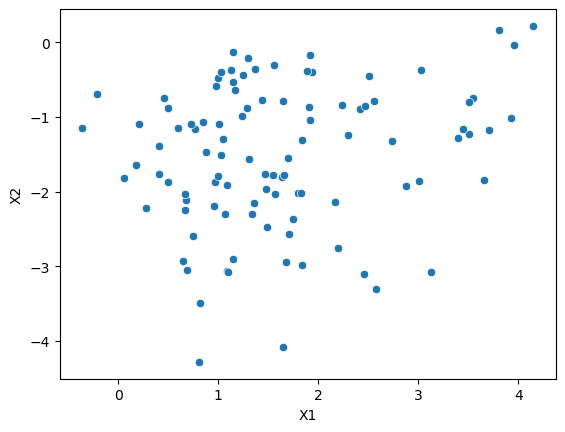

In [ ]:
#graphique
import seaborn as sns
sns.scatterplot(data=dfDoc2Vec,x='X1',y='X2')

In [ ]:
dfDoc2Vec

,X1,X2,polarite
0,0.648915,-2.929711,1
1,1.466017,-1.769099,0
2,1.799427,-2.023257,1
3,2.455747,-3.107562,1
4,1.311184,-1.557100,1
...,...,...,...
95,1.654263,-1.783042,1
96,3.446244,-1.153967,1
97,0.666839,-2.036388,1
98,1.841621,-1.304346,1


<Axes: xlabel='X1', ylabel='X2'>

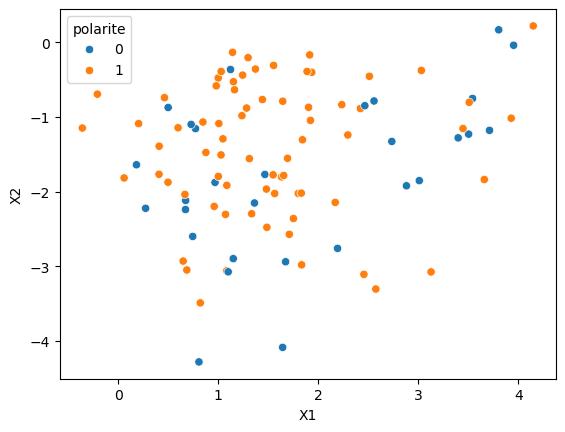

In [ ]:
#ajouter la polarité
dfDoc2Vec['polarite'] = D.label

#refaire le graphique avec la polarité
sns.scatterplot(data=dfDoc2Vec,x='X1',y='X2',hue='polarite')

### Prédiction et évaluation en test

##### Résultat  avec le modèle de vectorisation Word2vec

Il sera important tout d'abord important de subdiviser notre base de données en deux échantillons (Tran, Test) avant d'entraitner le modèle Word2vec.

C'est sur cette bases d'entrainement que sera calibrer notre perceptron multicouche et par la suite l'échantillon de test sera vectorisé et tester sur le perceptron

Ici nous N'observons pas cette démarche et splitons la base entière qui a été vectorisée dès le debut à savour la base : 

In [ ]:
df2

,v1,v2,label
0,-0.043817,-0.143127,1
1,0.024397,-0.102080,0
2,-0.016043,0.056789,1
3,0.025773,0.002279,1
4,0.071744,-0.055290,1
...,...,...,...
95,0.049475,0.021046,1
96,-0.008186,0.044711,1
97,0.024467,0.009160,1
98,-0.005413,0.059268,1


c:\Users\FranckOséeDOUNTIOZAB\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
✅ Accuracy: 0.7500
✅ F1-score: 0.8571

📊 Rapport complet :

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.75      1.00      0.86        15

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20



c:\Users\FranckOséeDOUNTIOZAB\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\FranckOséeDOUNTIOZAB\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\FranckOséeDOUNTIOZAB\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

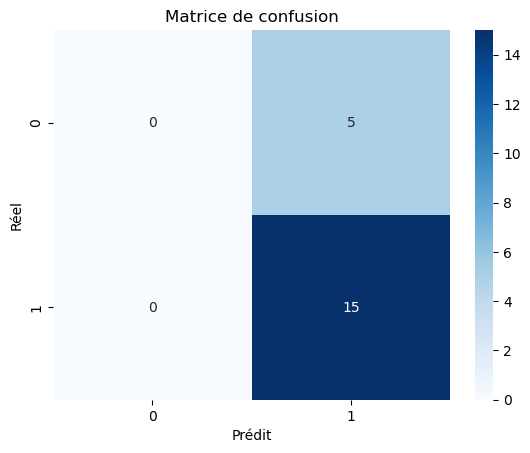

In [ ]:
# Tratement de données 
X = df2[['v1', 'v2']].values
y = df2['label'].values

# 2. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Modèle MLP
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 4. Compilation
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# 5. Entraînement
history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0, validation_data=(X_test, y_test))

# 6. Prédiction
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# 7. Évaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1-score: {f1:.4f}")
print("\n📊 Rapport complet :\n")
print(classification_report(y_test, y_pred))

# 8. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

##### Résultat  avec le modèle de vectorisation Doc2vec


In [ ]:
dfDoc2Vec

,X1,X2,polarite
0,0.648915,-2.929711,1
1,1.466017,-1.769099,0
2,1.799427,-2.023257,1
3,2.455747,-3.107562,1
4,1.311184,-1.557100,1
...,...,...,...
95,1.654263,-1.783042,1
96,3.446244,-1.153967,1
97,0.666839,-2.036388,1
98,1.841621,-1.304346,1


c:\Users\FranckOséeDOUNTIOZAB\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
✅ Accuracy: 0.7500
✅ F1-score: 0.8485

📊 Rapport complet :

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.78      0.93      0.85        15

    accuracy                           0.75        20
   macro avg       0.64      0.57      0.57        20
weighted avg       0.71      0.75      0.71        20



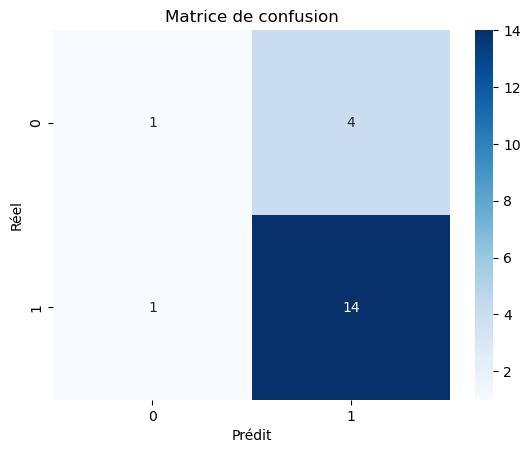

In [ ]:
# Tratement de données 
X = dfDoc2Vec[['X1', 'X2']].values
y = dfDoc2Vec['polarite'].values

# 2. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Modèle MLP
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 4. Compilation
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# 5. Entraînement
history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0, validation_data=(X_test, y_test))

# 6. Prédiction
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# 7. Évaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1-score: {f1:.4f}")
print("\n📊 Rapport complet :\n")
print(classification_report(y_test, y_pred))

# 8. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

#### Travaux

In [ ]:
document_1 = "le chat mange la souris"
document_2 = "le chien regarde le canard"
document_3 = "le canard regarde le chat"
corpus = (document_1, document_2, document_3)

In [ ]:
# construction du vocabulaire
vocabulary = []
for d in corpus:
    for w in d.split(" "):
        if w not in vocabulary:
            vocabulary.append(w)


In [ ]:
vocabulary

['le', 'chat', 'mange', 'la', 'souris', 'chien', 'regarde', 'canard']

In [ ]:
# initialisation de l'histogramme
freq = dict()
for v in vocabulary:
    freq[v] = 0

{'le': 5, 'chat': 2, 'mange': 1, 'la': 1, 'souris': 1, 'chien': 1, 'regarde': 2, 'canard': 2}


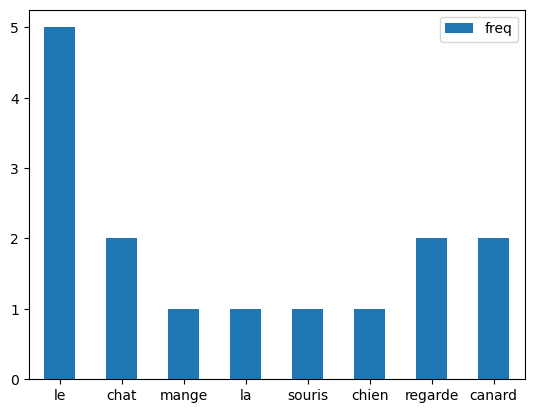

In [ ]:
# comptage des occurrences
for d in corpus:
    for w in d.split(" "):
        freq[w] += 1
print(freq)
df = pd.DataFrame({'freq':freq.values()}, index=freq.keys())
ax = df.plot.bar(rot=0)
plt.show()


In [ ]:
# calcul d'un histogramme par document
import numpy as np
V = len(vocabulary)
D = len(corpus)
tf_idf = np.zeros([D, V])
for i, d in enumerate(corpus):
    for w in d.split(" "):
        j = vocabulary.index(w)
        tf_idf[i,j] += 1
        
print(tf_idf)

[[1. 1. 1. 1. 1. 0. 0. 0.]
 [2. 0. 0. 0. 0. 1. 1. 1.]
 [2. 1. 0. 0. 0. 0. 1. 1.]]


In [ ]:
vocabulary

['le', 'chat', 'mange', 'la', 'souris', 'chien', 'regarde', 'canard']

In [ ]:
corpus

('le chat mange la souris',
 'le chien regarde le canard',
 'le canard regarde le chat')

In [ ]:
enumerate(corpus)

##### Word2vec

In [ ]:
# pip install gensim

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# données d'entraînement tokenisation
p_1=document_1.split(" ")
p_2=document_2.split(" ")
p_3=document_3.split(" ")

corpus=[p_1,p_2,p_3]

In [ ]:
# Paramétrage de l'entraînement
model = Word2Vec(min_count=1, vector_size=5)

In [ ]:
# creation du dictionnaire 
model.build_vocab(corpus) 

In [ ]:
corpus

[['le', 'chat', 'mange', 'la', 'souris'],
 ['le', 'chien', 'regarde', 'le', 'canard'],
 ['le', 'canard', 'regarde', 'le', 'chat']]

In [ ]:
model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)

(7, 75)

In [ ]:
print(list(model.wv.index_to_key[ ]))  # Adjust the number to see more


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1734034339.py, line 1)

In [ ]:
model.wv['chat']

array([-0.03632035,  0.0575316 ,  0.01983747, -0.1657043 , -0.18897636],
      dtype=float32)

In [ ]:
#model.wv['souris']
print(model.wv.most_similar(positive=['chien'] ,topn=3))


[('canard', 0.072651706635952), ('regarde', -0.06693901866674423), ('la', -0.08407305926084518)]


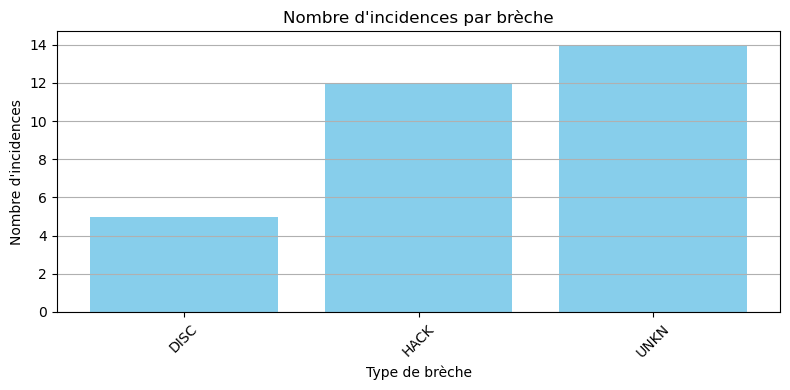

In [ ]:
# Compter les occurrences par année
yearly_counts = df_filtré['breach_type'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(8, 4))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')

# Ajouter les étiquettes
plt.title("Nombre d'incidences par brèche")
plt.xlabel("Type de brèche")
plt.ylabel("Nombre d'incidences")

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Perceptron 

In [ ]:
corpus

('le chat mange la souris',
 'le chien regarde le canard',
 'le canard regarde le chat')

In [ ]:
d.split()

['le', 'canard', 'regarde', 'le', 'chat']

In [ ]:
d

'le canard regarde le chat'